In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import confusion_matrix
import pylab
import seaborn as sns
#plt.style.use('seaborn')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 10)

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

---

# Очистка данных

***Мусор на входе модели $\to$ мусор на выходе.***

Ни одна модель машинного обучения не выдаст осмысленных результатов, если вы предоставите ей сырые данные. После формирования выборки данных их необходимо очистить.

[Очистка данных](https://en.wikipedia.org/wiki/Data_cleansing) – это процесс обнаружения и исправления (или удаления) поврежденных или неточных записей из набора записей, таблицы или базы данных. Процесс включает в себя выявление неполных, неправильных, неточных или несущественных данных, а затем замену, изменение или удаление «загрязненных» данных.

---

Очистка данных занимает до 90% ресурса проекта по разработке новой модели. В общем случае механистический подход к очистке позволяет получить средний уровень качества данных. Однако, хороший уровень качества данных предполагает творческий подход, результат которого зависит, в том числе, от понимания бизнес-процессов исследователем.

Ознакомление с очисткой данных мы будем проводить на датасете [Титаник](https://ru.wikipedia.org/wiki/Титаник).

---

Загрузим данные:

In [4]:
df = pd.read_csv('/Users/Int/DS/Python_DS_beginner._Team00-0/datasets/titanic_train.csv')      # Данные для обучения
df_test = pd.read_csv('/Users/Int/DS/Python_DS_beginner._Team00-0/datasets/titanic_test.csv')  # Данные для тестирования
dg = pd.read_csv('/Users/Int/DS/Python_DS_beginner._Team00-0/datasets/gender_baseline.csv')    # Метки классов для тестовых данных

---

Посмотрим на данные:

In [5]:
df.shape

(850, 15)

In [6]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [7]:
df_test.shape

(459, 14)

In [9]:
df_test.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN


In [ ]:
dg.head()

,passenger_id,survived
0,295,0
1,1150,0
2,89,0
3,1063,0
4,1020,0


---

Обучающая выборка содержит 15 признаков и 850 объектов. Тестовая выборка содержит 14 признаков и 459 объектов. Результирующий признак **survived** вынесен из тестовой выборки в отдельную таблицу.

---

# 1. Обработка отсутствущих значений

Обработка отсутствующих значений - самая распространенная проблема очистки данных. 

Первая задача - это найти отсутствующие значения.

---

## Поиск и визуализация отсутствующих значений

Рассмотрим три метода обнаружения отсутствующих значений.

**Тепловая карта пропущенных значений:**

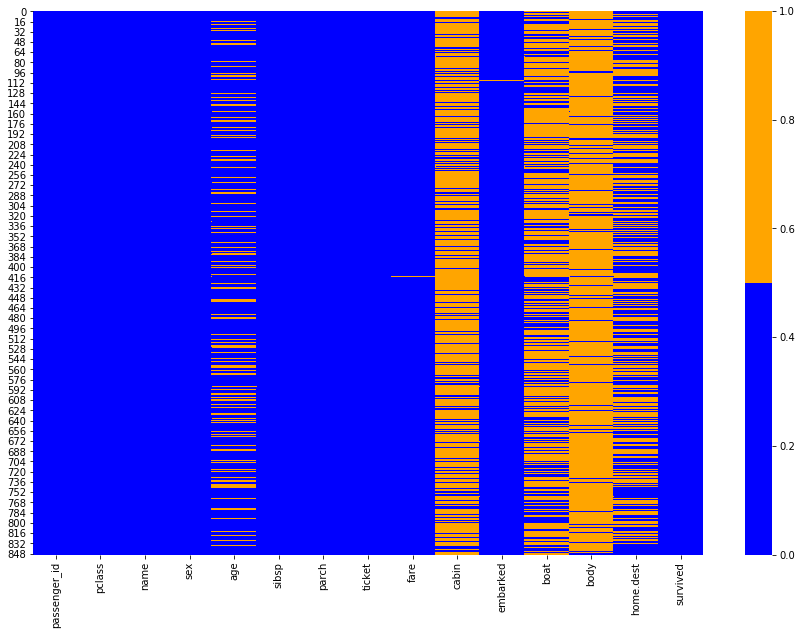

In [ ]:
sns.heatmap(df.isna(), cmap=sns.color_palette(['blue','orange']))
plt.show()

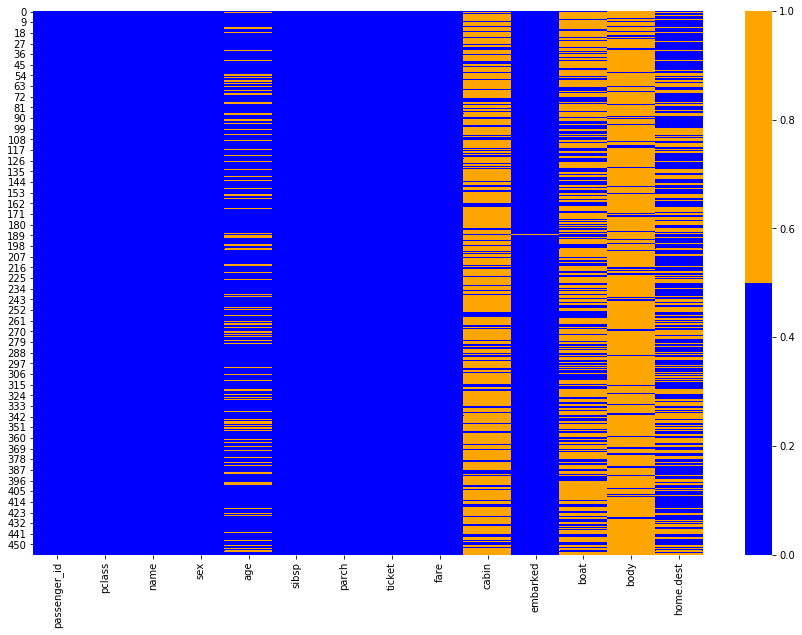

In [ ]:
sns.heatmap(df_test.isna(), cmap=sns.color_palette(['blue','orange']))
plt.show()

---

На картах видно как по столбцам датафрейма распределены отсутствующие значения. Сравнивая карты обучающей и тестовой выборки, можно сделать вывод о соответствии по столбцам частоты пропусков.

---

**Процентный список пропущенных данных:**

In [ ]:
df.isna().mean().round(4)*100

passenger_id     0.00
pclass           0.00
name             0.00
sex              0.00
age             20.47
sibsp            0.00
parch            0.00
ticket           0.00
fare             0.12
cabin           77.53
embarked         0.12
boat            63.76
body            91.41
home.dest       45.41
survived         0.00
dtype: float64

In [ ]:
df_test.isna().mean().round(4)*100

passenger_id     0.00
pclass           0.00
name             0.00
sex              0.00
age             19.39
sibsp            0.00
parch            0.00
ticket           0.00
fare             0.00
cabin           77.34
embarked         0.22
boat            61.22
body            89.54
home.dest       38.78
dtype: float64

---

Процентный список позволяет, как это следует из название, увидеть числовое значение количества отсутствующих значений в столбцах в процентах. Сравнивая проценты в обучающей и тестовой выборках, можно сделать вывод об их взаимном соответствии.

---

**Гистограмма пропущенных данных:**

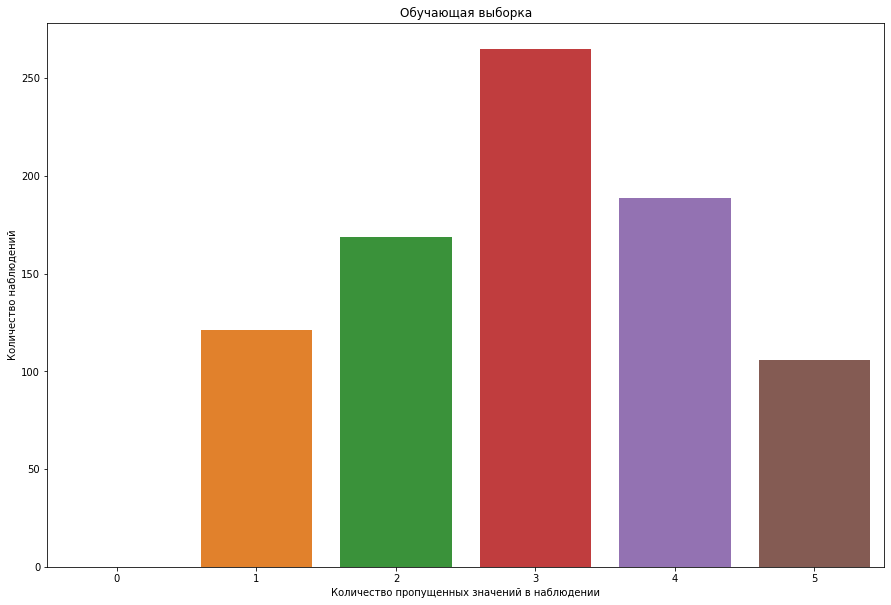

In [ ]:
def plot_bar_missing_data(df, n_selection = 0):
    """Построение гистограммы пропущенных данных.
       df - анализируемый датафрейм
       n_selection - номер выборки: обучающая - 0, тестовая - 1"""
    dfT = df.T.isna().sum()
    dft = pd.DataFrame()
    dft['Количество пропущенных значений в наблюдении'] = [j for j in range(dfT.max() + 1)]
    dft['Количество наблюдений'] = [len(dfT[dfT == j]) for j in range(dfT.max() + 1)]
    sns.barplot(x = 'Количество пропущенных значений в наблюдении', y = 'Количество наблюдений', data = dft)
    title = ['Обучающая выборка', 'Тестовая выборка']
    plt.title(title[n_selection])
    plt.show()
    
plot_bar_missing_data(df)

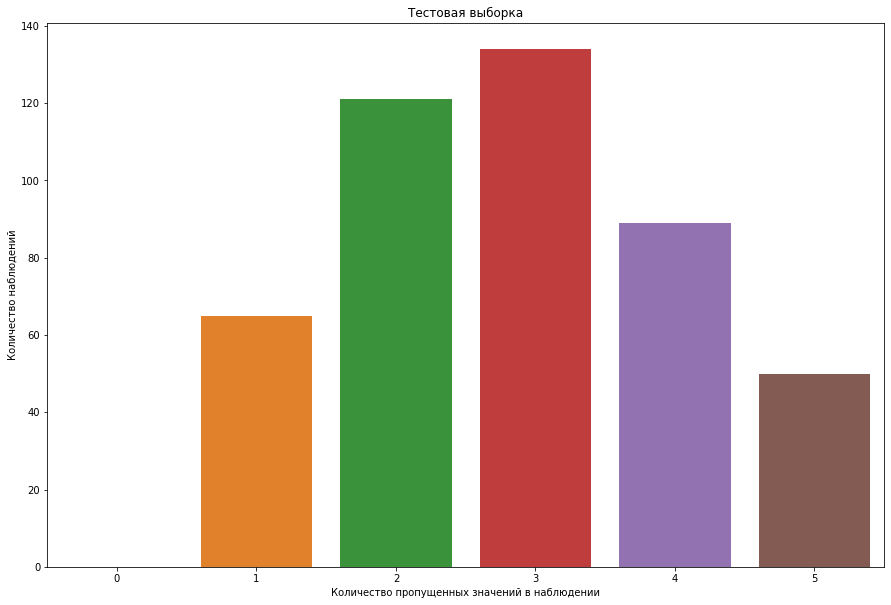

In [ ]:
plot_bar_missing_data(df_test, 1)

---

По результатам анализа гистограмм пропущенных значений, и в обучающей и в тестовой выборке отсутствуют наблюдения с полным набором значений показателей.

---

Посмотреть количество непустых ячеек датафрейма можно с помощью *info()*:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  459 non-null    int64  
 1   pclass        459 non-null    int64  
 2   name          459 non-null    object 
 3   sex           459 non-null    object 
 4   age           370 non-null    float64
 5   sibsp         459 non-null    int64  
 6   parch         459 non-null    int64  
 7   ticket        459 non-null    object 
 8   fare          459 non-null    float64
 9   cabin         104 non-null    object 
 10  embarked      458 non-null    object 
 11  boat          178 non-null    object 
 12  body          48 non-null     float64
 13  home.dest     281 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 50.3+ KB


---

## Методы обработки отсутствующих значений

После выявления отсутствующих значений, их необходимо обработать. Для обработки отсутствующих значений существуют четыре механистических метода и творческие подходы. Начнем рассмотрение с механистических методов.

---

### Удаление наблюдений

Самый простой способ - это удалить наблюдение, содержащее пропущенные записи. Метод подходит для больших объемов данных и относительно небольшой доли удаляемых наблюдений. При удалении наблюдений следует провести проверку структуры данных. Как минимум должна сохраняться или изменяться незначительно доля наблюдений в классах. Так же можно провести кластерный анализ и исследовать долю наблюдений в кластерах.

Данный метод нам не подходит по двум причинам. В нашем датафрейме каждая строка содержит отсутствующие значения, следовательно удалить придется весь датафрейм. Вторая причина заключается в относительно малом количестве наблюдений. 

---

### Удаление признаков

Если признак содержит большое количество пропусков и не является информативным, то можно его удалить. Иформативность признака можно установить через его корреляцию с результирующим признаком, или на основе анализа бизнес-процессов.

Рассмотрим признаки, содержащие пропущенные значения, и добавим немного творчества.

***body*** - признак содержит наибольшее количество пропусков. Расшифровки названия признака в датасете нет, но определенные предположения можно высказать. Для начала проверим имеющиеся значения в признаке на уникальность. Равно ли количество записей с непропущенными данными количеству уникальных записей?

In [ ]:
len(df[df.body.isna() == False]) == len(df.body[df.body.isna() == False].unique())

True

---

Повторов нет. Теперь проверим количество выживших среди записей с непропущенными данными признака body:

In [ ]:
df.survived[df.body.isna() == False].sum()

0

---

Выживших нет. Можно сделать вывод, что это какой-то идентификатор тел погибших. Проверим гипотезу на тестовых днных:

In [ ]:
len(df_test[df_test.body.isna() == False]) == len(df_test.body[df_test.body.isna() == False].unique())

True

In [ ]:
dg.survived[df_test.body.isna() == False].sum()

3

---

В тестовых данных 3 выживших. Гипотеза не подтвердилась. Но! Мы с вами занимаемся очисткой данных, а в них кроме пропущенных бывают и ошибочные значения. После поиска в Интернет удалось найти [описание признака](https://data.world/nrippner/titanic-disaster-dataset). ***body*** - body number (if did not survive and body was recovered). Очевидно, что признак информативный и удалять его нельзя. 

И еще одно но! Если мы просто пытаемся отделить живых от мертвых, то признак информативен, а если мы с вами пытаемся оценить факторы выживаемости, то признак не несет информации, так как факторы выживаемости сработали перед появлением данного признака. Это означает, что признак необходим только с точки зрения изменения ошибочных данных.

В выборке для обучения мы не нашли несостыковок, связанных с признаком ***body***, в тестовой выборке были обнаружены три несостыковки. Можем ли мы их поправить? Нет, не можем. Тестовые данные могут модифицироваться так же как и данные для обучения, но изменяться отдельные значения не могут. Этому есть несколько причин:
1. Ошибки всегда возможны, и полученная модель должна работать в том числе и с ошибочными данными.
2. По идее, признак survived для тестовых данных нам вообще не должен быть виден, поэтому он и вынесен в отдельный файл, а без него мы не смогли бы установить несоответствия.
3. Мы не знаем где точно ошибка, в survived или в body.

Признак ***body*** следует удалить.

---

***cabin*** - следующий по объему пропущенных значений признак. Значение признака описывается палубой и номером каюты. Этот признак был бы важен в оценке выживаемости, так как чем ниже палуба, тем дольше добираться до шлюпок, тем более, что проходы с нижних палуб на верхние были открыты не сразу. Однако большое количество пропусков делают этот признак почти бесполезным. Однако, история гласит, что найден был список пассажиров только для кают первого класса. Следовательно, сообщить номера кают пассажиров из второго и третьего класса могли только выжившие.

Посмотрим общее количество выживших с заполненным признаком, и количество значений в признаке:

In [ ]:
print(df.survived[df.cabin.isna() == False].sum(), len(df.survived[df.cabin.isna() == False]))

127 191


---

И то же самое, но только для пассажиров кают 2 и 3 класса:

In [ ]:
print(df.survived[(df.cabin.isna() == False) & (df.pclass != 1)].sum(), 
      len(df.survived[(df.cabin.isna() == False) & (df.pclass != 1)]))

19 27


---

Для того, чтобы понять значимость результата необходимо взглянуть на распределение погибших по классам кают:

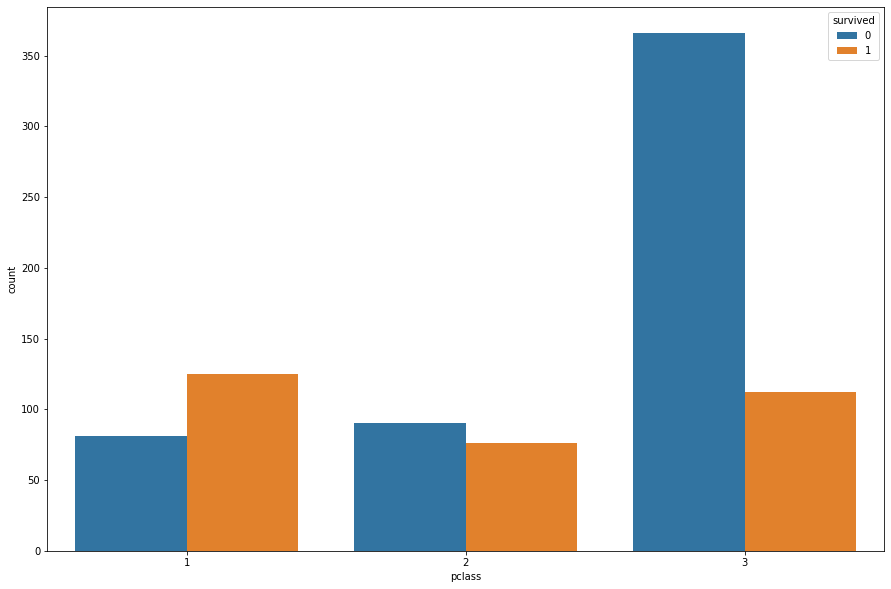

In [ ]:
sns.countplot(x = 'pclass', hue = 'survived', data = df)
plt.show()

---

Во втором классе погибло больше, чем спаслось, а в третьем - абсолютное большинство. Поэтому $19/27$ уверенности в выживании для 27 пассажиров 2 и 3 классов кают может оказаться значимым фактором. Признак ***cabin*** удалять нельзя.

---

***boat*** - признак, отражающий номер шлюпки выжившего пассажира. К этому признаку, с точностью до знака, подходят рассуждения, изложенные при анализе признака body. Признак следует удалить. Однако в начале необходимо будет провести анализ несостыковок в данных для обучения с использованием признака.

In [ ]:
print(df.survived[df.boat.isna() == False].sum(), len(df.survived[df.boat.isna() == False]))

300 308


---

Анализ показывает, что из 308 пассажиров, севших в шлюпки выжило всего 300. Это противоречит описанию признака, что все севшие в шлюпки пассажиры выжили. Рассмотрим подробнее противоречивые данные:

In [14]:
df[(df.boat.isna() == False) & (df.survived == 0)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
217,19,1,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN",0
219,1299,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN,0
272,968,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S,A,NaN,NaN,0
333,969,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.5500,NaN,S,A,NaN,NaN,0
415,166,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C,14,NaN,"New York, NY",0
443,544,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S,12,NaN,"Elizabeth, NJ",0
486,655,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,D,NaN,"Ruotsinphytaa, Finland New York, NY",0
644,921,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S,A,NaN,NaN,0


---

Видно, что в признаке присутствуют численные и буквенные значения. На Титанике было 20 шлюпок, которые нумеровались числами. Посмотрим количество уникальных записей столбеца boat:

In [15]:
len(df.boat.unique())

27

---

27 - это явно больше 20 шлюпок. Какие конкретно записи и сколько раз встречаются:

In [16]:
df.boat.value_counts()

4          25
C          24
13         23
14         23
15         19
10         18
16         18
9          18
3          16
11         16
7          14
D          14
8          13
6          12
5          12
12         11
A          10
2           9
B           4
1           2
C D         2
5 7         1
5 9         1
13 15       1
13 15 B     1
15 16       1
Name: boat, dtype: int64

Проведенный анализ показывает сильную "загрязненность" признака ***boat***. В пользу того факта, что ошибки именно в анализируемом признаке, говорят следующие суждения:
1. Списки погибших и выживших неоднократно публиковались и, следовательно, ошибки в этих списках маловероятны.
2. Доля выживших мужчин из кают третьего класса составляет всего 0.15, а в противоречивых данных 50% составляют именно они (график выживаемости мужчин ниже). Выживаемость среди мужчин составляет 32%, 16% и 15% соответственно для кают 1, 2 и 3-го классов.

Признак ***boat*** необходимо удалить без изменения прочих данных.

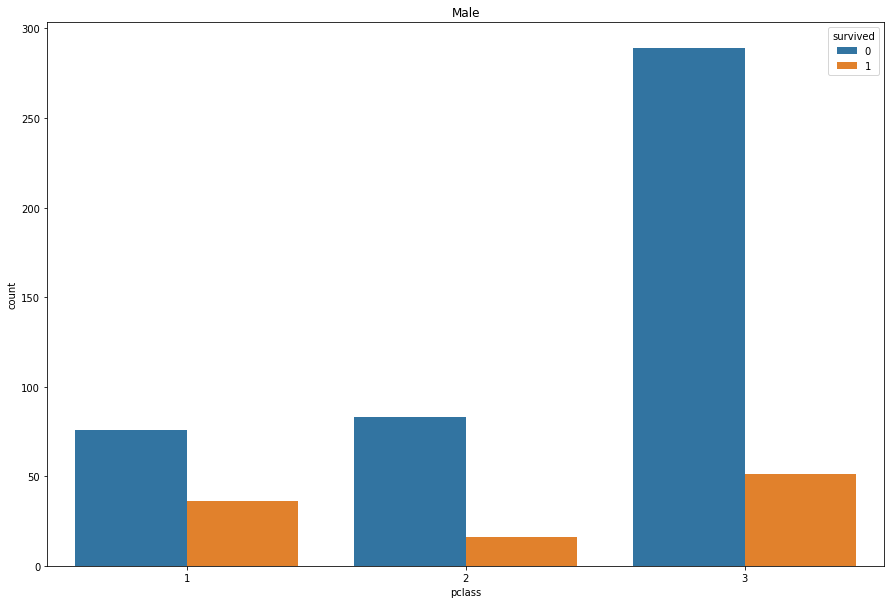

In [17]:
sns.countplot(x = 'pclass', hue = 'survived', data = df[df.sex == 'male'])
plt.title('Male')
plt.show()

---

***home.dest*** - место жительства. Признак можно удалять, т.к. место жительства объективно не влияет на выживаемость.

---

***age*** - возраст. После приказа капитана сажать в шлюпки женщин и детей, признак приобрел высокую информативность с точки зрения фактора выживания. Признак удалять нельзя.

---

***fare*** - стоимость билета. Стоимость билета может содержать информацию, которую мы не смогли извлечь из признака *cabin*, а именно палубу, на которой размещалась каюта. Однако кроме этой информации в стоимости билета учитывается порт посадки, количество родственников, и совершенно неизвестная информация о возможной плавающей стоимости билета в зависимости от места и даты продажи. Использование данного признака может привести к зашумлению данных и переобучению модели. Возможно потребуется применение метода главных компонент. Однако, предположение о содержании в признаке информации о факторах выживания перевешивает возникающие при его применении риски и неудобства. Признак не рекомендуется удалять.

---

***embarked*** - порт посадки. 10 апреля 1912 года «Титаник» отправился из Саутгемптона (S) в Нью-Йорк, совершив остановки во французском Шербуре (С) и ирландском Квинстауне (Q). Есть две причины, почему нельзя удалять этот признак.

Первая причина - в зависимости от порта посадки наблюдается различное распределение долей выживших. Например, севших в Шербуре выжило больше половины:

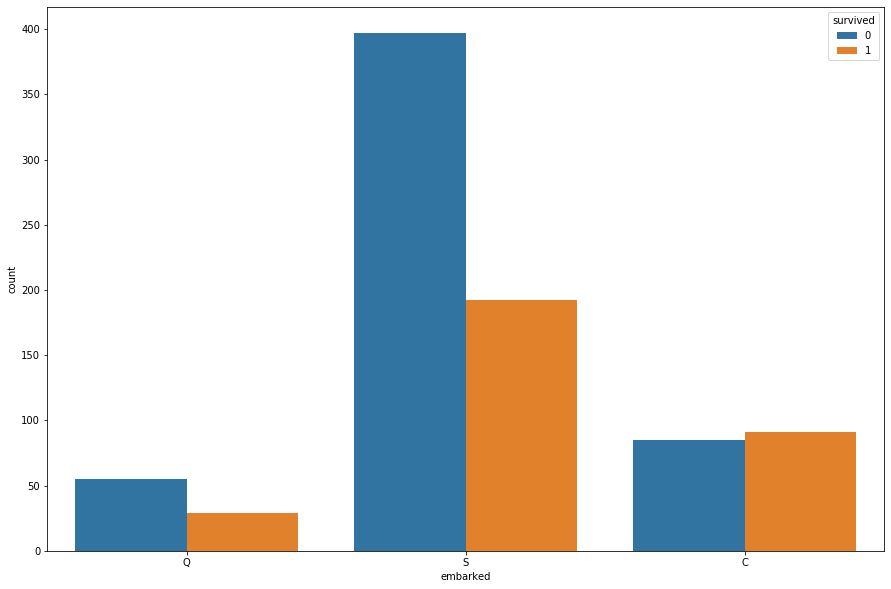

In [ ]:
sns.countplot(x = 'embarked', hue = 'survived', data = df)
plt.show()

---

Однако такой резуьтат может объясняться распределением пассажиров по классам кают:

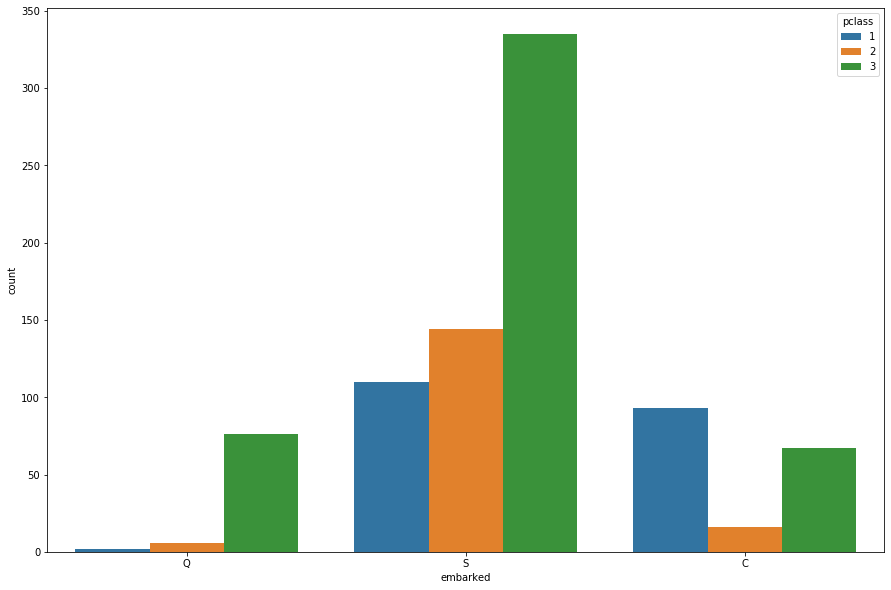

In [ ]:
sns.countplot(x = 'embarked', hue = 'pclass', data = df)
plt.show()

---

Вторая причина - это при формировании главных компонент, с целью формирования информации о палубах из признака fare, признак embarked может "оттянуть на себя" различие в цене, связанное с портом посадки. Признак удалять не рекомендуется.

---

Резюме. По результатам анализа принято решение удалить признаки:
- ***body***;
- ***boat***;
- ***home.dest***.

Удаление признаков:

In [ ]:
df = df.drop(['boat', 'body', 'home.dest'], axis=1)
df_test = df_test.drop(['boat', 'body', 'home.dest'], axis=1)

---

### Внесение недостающих значений

Для численных признаков можно воспользоваться методом принудительного заполнения пропусков. Например, на место пропуска можно записать среднее или медианное значение, полученное из остальных записей.

Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся значение.

---

Внесем недостающее значение в признак ***fare***:

In [ ]:
df[df.fare.isna()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
416,1225,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


---

На стоимость билета могут влиять:
- Порт отправления;
- Класс каюты;
- Количество сопровождающих братьев, сестер;
- Количество сопровождающих родителей, детей.

Сформируем срез датасета, соответствующий по перечисленным параметрам наблюдению, с отсутствующим значением fare, и рассмотрим среднее, медианное, максимальное и минимальное значение цены:

In [ ]:
slz = df[(df.pclass == 3) & (df.sibsp == 0) & (df.parch == 0) & (df.embarked == 'S')]
round(slz.fare.mean(), 2), round(slz.fare.median(), 2), slz.fare.max(), slz.fare.min()

(10.2, 7.9, 56.4958, 0.0)

---

Наблюдаем сильное отклонение среднего значения от медианного и очень большой разброс между максимальной и минимальной стоимостью. Посмотрим на графике:

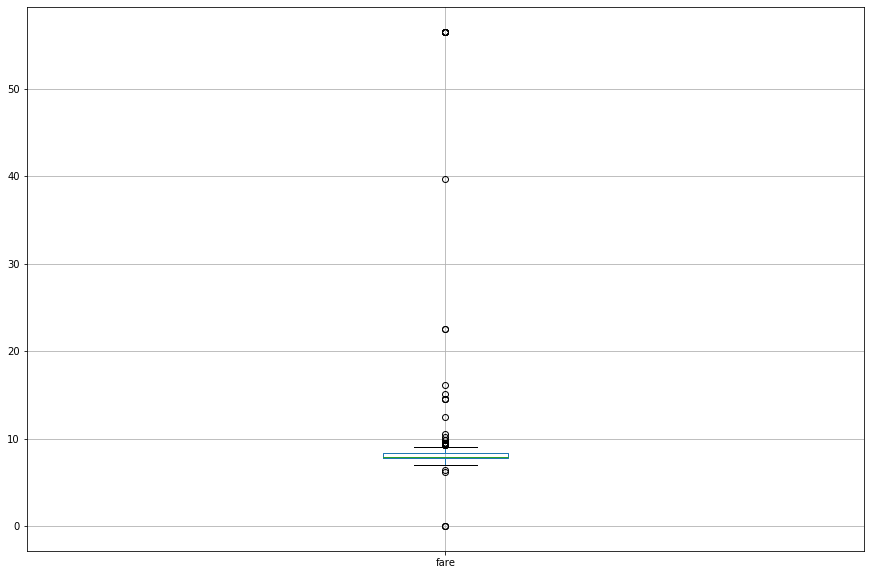

In [ ]:
slz.boxplot('fare')
plt.show()

---

Точки, превышающие значение 20 и точка со значением 0 представляют из себя выбросы. Обработку выбросов мы рассмотрим позднее, а пока посмотрим, кому повезло купить самый дорогой билет:

In [ ]:
slz[slz.fare > 50]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
176,949,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,1
233,946,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,0
337,805,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,1
435,972,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,0
508,714,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,1
688,945,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
690,858,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S,1
708,674,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1


---

Оказывается это один билет для восьми человек, и, следовательно, проезд одного человека стоит 7.061975. Проверим гипотезу на следующих по дороговизне двух билетах:

In [ ]:
slz[(slz.fare > 35) & (slz.fare < 50)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
259,1147,3,"Riihivouri, Miss. Susanna Juhantytar ""Sanni""",female,22.0,0,0,3101295,39.6875,NaN,S,0


In [ ]:
slz[(slz.fare > 20) & (slz.fare < 35)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.525,NaN,S,0
315,620,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,22.525,NaN,S,0


---

Гипотеза подтвердилась только во втором случае. Однако, для проверки, необходимо посмотреть, есть ли еще на Титанике пассажиры с таким же номером билета:

In [ ]:
df[df.ticket == '3101295']

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
259,1147,3,"Riihivouri, Miss. Susanna Juhantytar ""Sanni""",female,22.0,0,0,3101295,39.6875,NaN,S,0
271,1102,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,0
574,1104,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,0
798,1101,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,0


---

Гипотеза подтвердилась. Три члена семейства Panula не попали в наш срез, так как у них ненулевые значения признаков sibsp и parch, а девушка, по всей видимости, является гувернанткой. Но где еще два брата/сестры и родитель? Поищем их по passenger_id равным 1099, 1100, 1103, 1105 и 1106:

In [ ]:
ID = [1099, 1100, 1103, 1105, 1106]
df[df.passenger_id.isin(ID)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
281,1100,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0


---

В выборке для обучения их не нашлось. Поищем в тестовой выборке:

In [ ]:
df_test[df_test.passenger_id.isin(ID)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
174,1103,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
247,1105,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
336,1099,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
367,1106,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S


---

Они в тестовой выборке и у них тот же билет. Это означает, что для поиска стоимости билета на одного человека придется рассматривать и обучающую и тестовую выборки вместе. Создадим столбец ***rate_per_person***, куда запишем стоимость билета в расчете на одного человека:

In [ ]:
tickets = set(df.ticket) | set(df_test.ticket)
df['rate_per_person'] = np.nan
df_test['rate_per_person'] = np.nan
for j in tickets:
    k = len(df[df.ticket == j]) + len(df_test[df_test.ticket == j])
    p = (df.fare[df.ticket == j].sum() + df_test.fare[df_test.ticket == j].sum()) / k
    df.rate_per_person[df.ticket == j] = round(p/k, 4)
    df_test.rate_per_person[df_test.ticket == j] = round(p/k, 4)
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,rate_per_person
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1,7.7333
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0,8.6625
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0,8.0500
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1,11.5000
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0,13.0000


---

Признак создан, проверим, все ли значения заполнены:

In [ ]:
print(len(df[df.rate_per_person.isna()]), len(df_test[df_test.rate_per_person.isna()]))

0 0


---

Пропущенных значений нет, и даже для отсутствующего значения fare, rate_per_person заполнен, но заполнен не правильно. Найдем всех пассажиров с тем же билетом:

In [ ]:
t = df.ticket[df.fare.isna()].iloc[0]
df[df.ticket == t]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,rate_per_person
416,1225,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,0.0


In [ ]:
df_test[df_test.ticket == t]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,rate_per_person


---

Билет уникальный. Теперь повторим все действия, которые выполняли в начале, но уже со столбцом rate_per_person:

In [19]:
slz = df[(df.pclass == 3) & (df.sibsp == 0) & (df.parch == 0) & (df.embarked == 'S') & (df.ticket != t)]
print(round(slz.rate_per_person.mean(), 2), round(slz.rate_per_person.median(), 2), 
      slz.rate_per_person.max(), slz.rate_per_person.min())

NameError: name 't' is not defined

---

Исключим из рассмотрения билет стоимостью 0:

In [18]:
slz = slz[slz.rate_per_person != 0]
print(round(slz.rate_per_person.mean(), 2), round(slz.rate_per_person.median(), 2), 
      slz.rate_per_person.max(), slz.rate_per_person.min())

NameError: name 'slz' is not defined

---

Посмотрим распределение стоимости на графике:

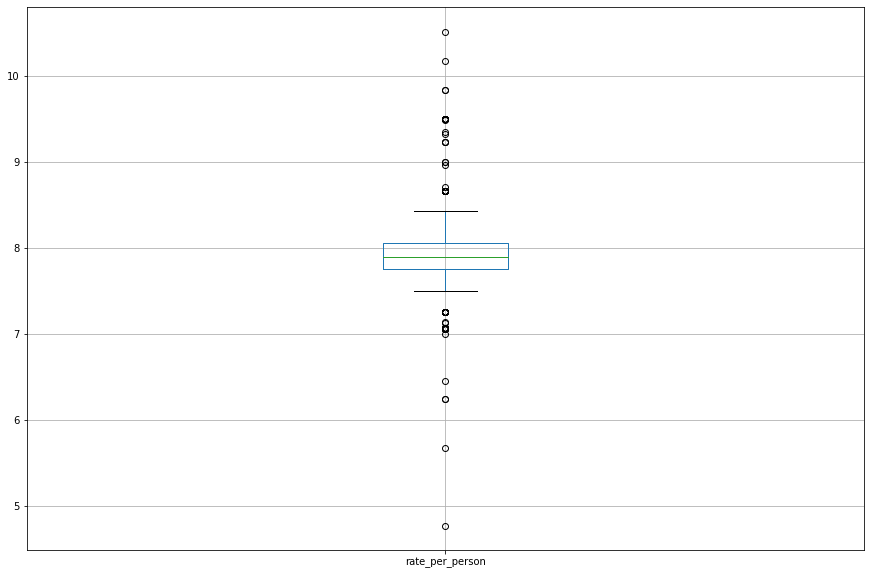

In [ ]:
slz.boxplot('rate_per_person')
plt.show()

---

Заполним пропущенное значение fare и соответствующиее ему значение rate_per_person средним значением:

In [20]:
df.fare[df.ticket == t] = round(slz.rate_per_person.mean(), 4)
df.rate_per_person[df.ticket == t] = round(slz.rate_per_person.mean(), 4)

NameError: name 'slz' is not defined

---

Мы устранили пропущенное значениев признаке fare. Однако мы в дальнейшем его уже не будем использовать. Вместо него мы будем пользоваться признаком rate_per_person.

---

Внесем недостающее значение в признак ***embarked***:

In [21]:
df[df.embarked.isna()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,1


---

Мы можем проставить пропущенное значение с помощью следующих способов:
1. Мы можем проставить наиболее часто встречающееся значение в признаке, т.е. S.
2. Так как rate_per_person в два раза меньше, чем fare, то пассажиров двое, и мы можем найти второго пассажира и посмотреть порт отправления.
3. Мы можем применить методику на основе кластеризации, как при проставлении пропущенного значения fare.
4. Мы можем поискать информацию в Интернет.

Так как решение первого пункта уже есть, то решим задачу тремя остальными.

---

Найдем второго пассажира и выясним порт отправления:

In [ ]:
df[df.ticket == '113572']

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,rate_per_person
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,40.0


In [ ]:
df_test[df_test.ticket == '113572']

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,rate_per_person
189,284,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,40.0


---

Второй пассажир оказался в выборке для теста и у него тоже не указан порт отправления. 

Сформируем срез датафрейма в соответствии с парметрами пассажира, отбросив нулевую стоимость билетов:

In [ ]:
slz = df[(df.pclass == 1) & (df.ticket != '113572') & (df.rate_per_person != 0)]

---

Построим графики распределения стоимости проезда в разрезе портов:

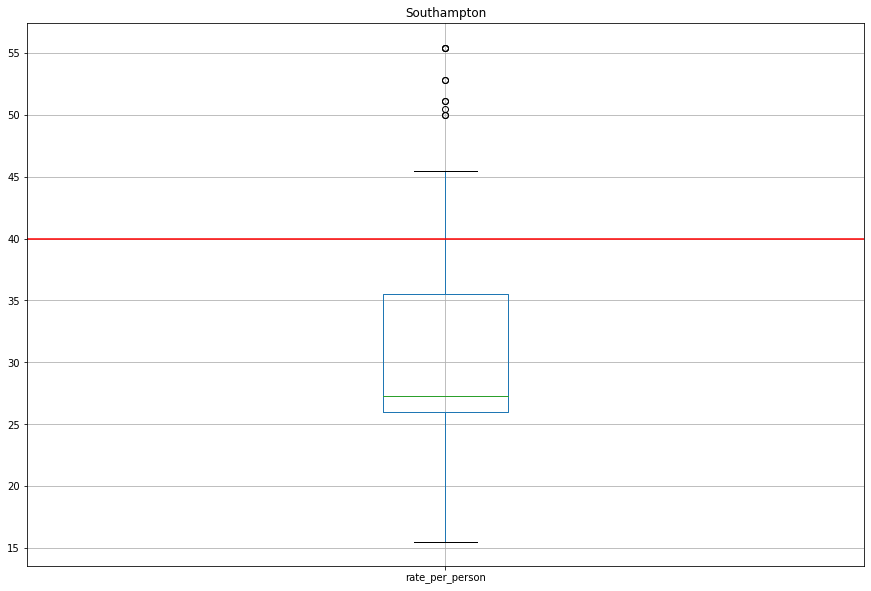

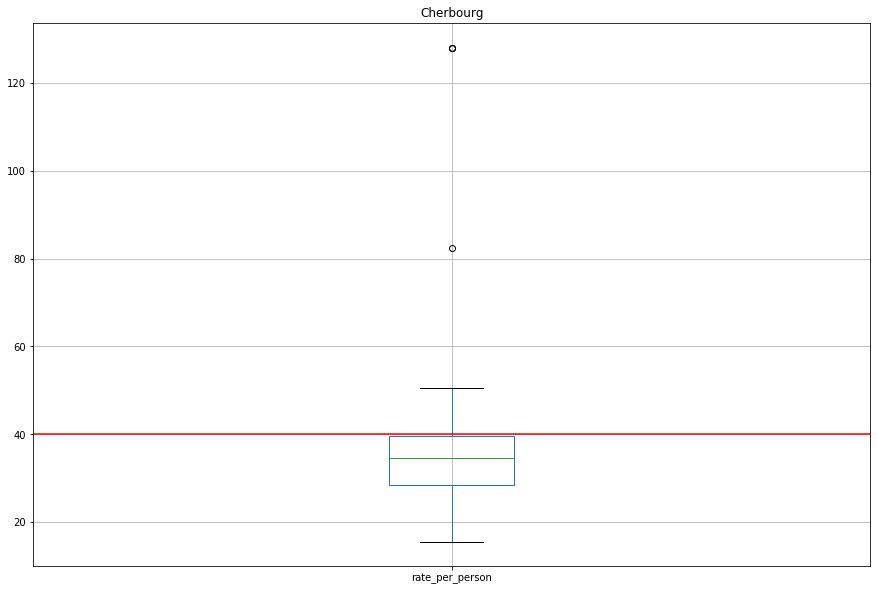

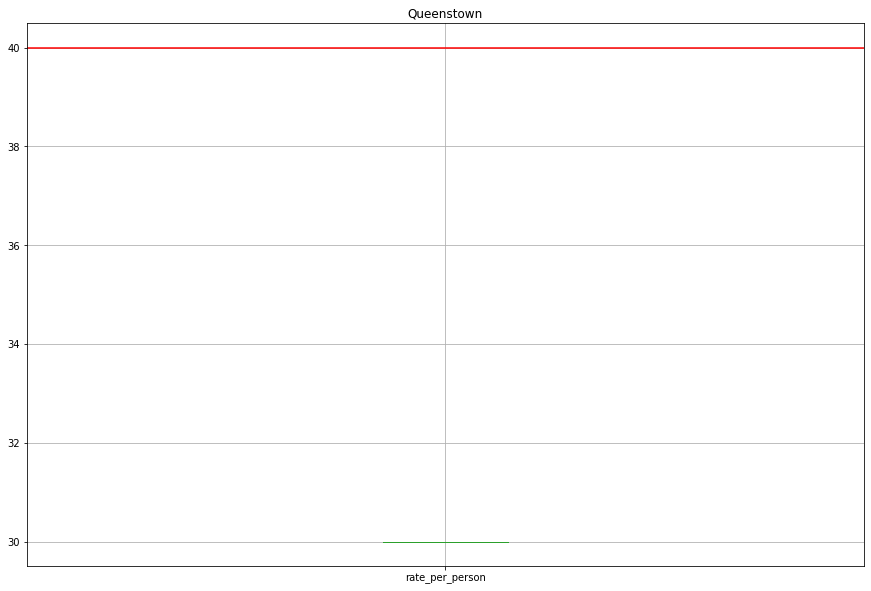

In [ ]:
for j in ['Southampton', 'Cherbourg', 'Queenstown']:
    slz[slz.embarked == j[0]].boxplot('rate_per_person')
    plt.axhline(40, c='r')
    plt.title(j)
    plt.show()

---

Судя по графикам, стоимость билета в большей степени соответствует Cherbourg. Однако наблюдаемые выбросы могут существенно искажать распределение.

После поиска в Интернет выяснилось, что [пассажирка](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html), как и ее [нанимательница](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html), отправилась из порта Southampton.

Внесем пропущенные значения в обучающую и тестовую выборки:

In [ ]:
df.embarked[df.embarked.isna()] = 'S'
df_test.embarked[df_test.embarked.isna()] = 'S'

---

Заполним пропущенные значения показателя ***age***

Вначале взглянем на распределение выживаемости по возростам. Для этого нам необходимо агрегировать возраст по десятилетиям

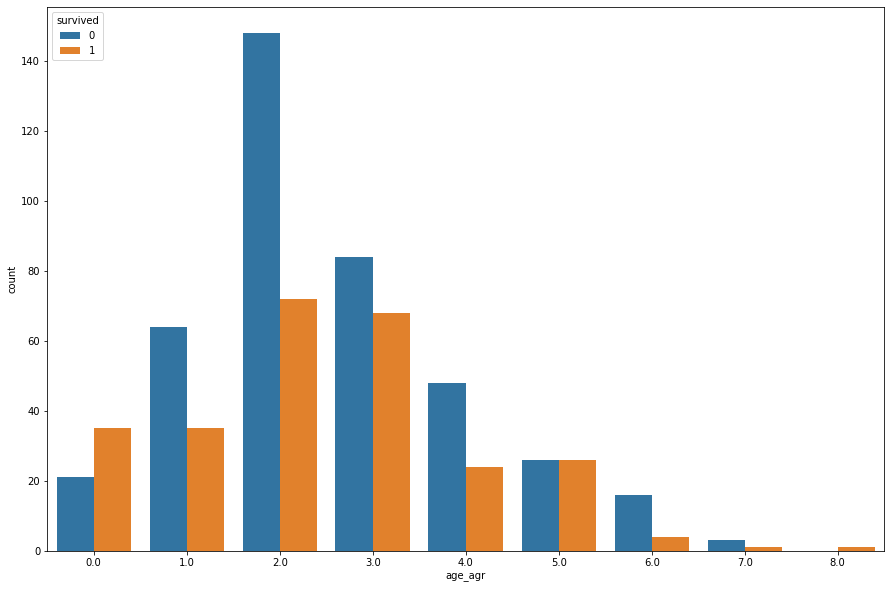

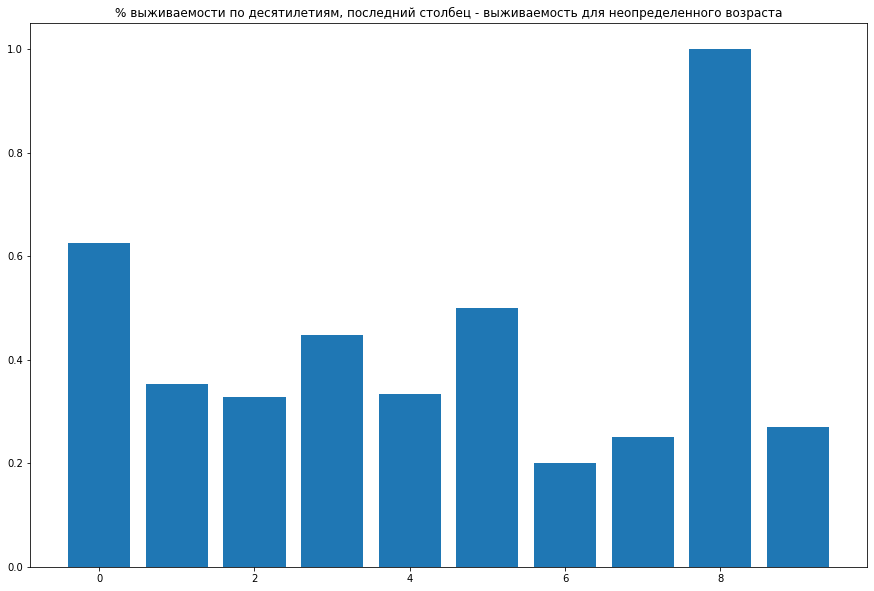

In [ ]:
df['age_agr'] = df.age // 10

sns.countplot(x = 'age_agr', hue = 'survived', data = df)
plt.show()

plt.bar([j for j in range(10)], 
        ([len(df[(df.age_agr == j) & (df.survived == 1)]) / len(df[df.age_agr == j]) for j in range(9)] + 
         [len(df[(df.age.isna()) & (df.survived == 1)]) / len(df[df.age.isna()])]))
plt.title('% выживаемости по десятилетиям, последний столбец - выживаемость для неопределенного возраста')
plt.show()

---

Механическое заполнение всех пропущенных значений медианой или средним приведет к потере существенной информации. Давайте разберемся, что из имеющейся информации поможет категоризировать пассажиров по возрастам:
1. Класс каюты. Можно предположить, что с возрастом люди начинают больше зарабатывать и могут позволить себе более комфортные условия путешествия.
2. Показатель name вторым словом содержит обращение, с помощью которого можно выделить детей.
3. Показатель parch - дети обычно путешествуют с родителями.

Проверим сформированные гипотезы.

1. Визуализируем возраст отдельно мужчин и женщин в разрезе класса кают

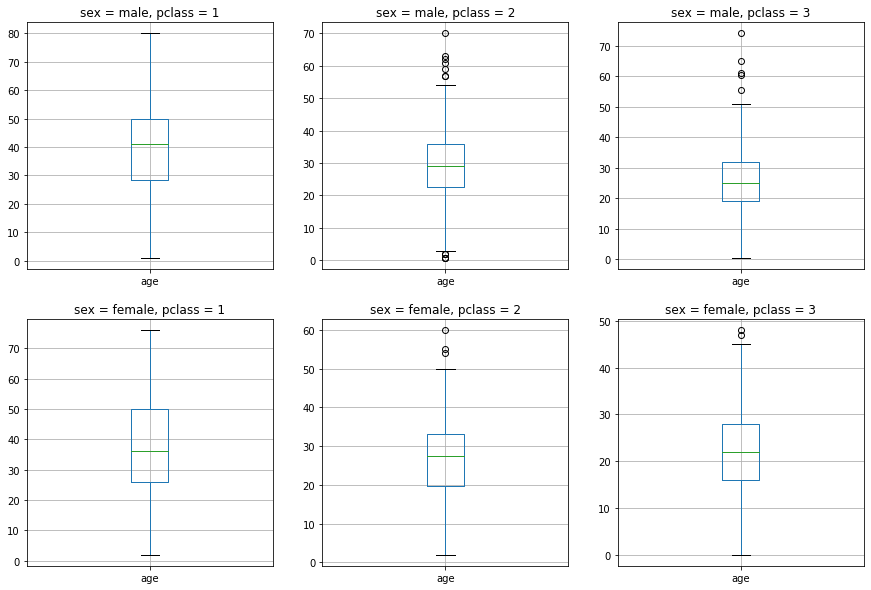

In [ ]:
slz = df[df.age.isna() == False]

for i, sex in enumerate(['male', 'female']):
    for j in range(1, 4):
        plt.subplot (2, 3, i*3 + j)
        slz[(slz.sex == sex) & (slz.pclass == j)].boxplot('age')
        plt.title('sex = '+sex+', pclass = '+str(j))

---

Гипотеза подтверждается - со снижением класса каюты, снижается и средний возраст пассажиров. Учитывая, что в дальнейшем расчет будет вестись с учетом выбросов, то лучше брать медианное, а не среднее значение.

2. Выделим из столбца name фамилию и запишем в столбец surname, затем выделим обращение и запишем его в столбец title:

In [ ]:
name = df.name.str.split(',',expand=True)
df['surname'] = name[0]
name = name[1].str.split('.',expand=True)
df['title'] = name[0].str[1:]
df.title.value_counts()

Mr              488
Miss            171
Mrs             123
Master           46
Dr                6
Rev               4
Col               3
Major             2
the Countess      1
Mlle              1
Ms                1
Jonkheer          1
Capt              1
Sir               1
Mme               1
Name: title, dtype: int64

---

У нас получилось 15 видов обращений, из них 11 обращений составляют менее 3% от общего числа. Проведем те же действия с тестовыми данными:

In [ ]:
name = df_test.name.str.split(',',expand=True)
df_test['surname'] = name[0]
name = name[1].str.split('.',expand=True)
df_test['title'] = name[0].str[1:]
df_test.title.value_counts()

Mr        269
Miss       89
Mrs        74
Master     15
Rev         4
Dr          2
Don         1
Col         1
Lady        1
Ms          1
Mlle        1
Dona        1
Name: title, dtype: int64

---

Добавилось еще три обращения. Посмотрим на выживаемость и наличие возраста у следующих групп:

In [ ]:
aristocrat = ['Sir', 'Jonkheer', 'the Countess', 'Don', 'Lady', 'Dona']
military = ['Col', 'Major', 'Capt']
doctor_of_the_soul_and_body = ['Dr', 'Rev']
df[df.title.isin(aristocrat)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,rate_per_person,age_agr,surname,title
255,100,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,28.4646,4.0,Duff Gordon,Sir
346,234,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,0,0.0000,3.0,Reuchlin,Jonkheer
550,245,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,1,28.8333,3.0,Rothes,the Countess


---

Данных конечно мало, но похоже у аристократов больше шансов спастись.

In [ ]:
df[df.title.isin(military)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,rate_per_person,age_agr,surname,title
231,10,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62 C64,C,0,45.505,4.0,Astor,Col
298,136,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.500,C51,C,1,28.500,5.0,Gracie,Col
334,231,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.500,C104,S,1,30.500,5.0,Peuchen,Major
447,305,1,"Weir, Col. John",male,60.0,0,0,113800,26.550,NaN,S,0,26.550,6.0,Weir,Col
468,45,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.550,B38,S,0,26.550,4.0,Butt,Major
529,81,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.000,B22,S,0,35.500,7.0,Crosby,Capt


---

Военные демонстрируют уровень, идентичный уровню выживаемости пассажиров мужчин 1 класса.

In [ ]:
df[df.title.isin(doctor_of_the_soul_and_body)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,rate_per_person,age_agr,surname,title
120,181,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,25.9292,4.0,Leader,Dr
159,508,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,0,14.0000,5.0,Moraweck,Dr
189,525,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,0,10.5000,2.0,Pain,Dr
232,40,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,0,39.6000,NaN,Brewe,Dr
295,476,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,NaN,S,0,13.0000,3.0,Lahtinen,Rev
404,93,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,1,27.2861,5.0,Dodge,Dr
511,357,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,0,13.0000,4.0,Byles,Rev
551,278,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,1,30.5000,3.0,Stahelin-Maeglin,Dr
577,472,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q,0,12.3500,5.0,Kirkland,Rev
819,532,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.0000,NaN,S,0,13.0000,4.0,Peruschitz,Rev


---

Докторов необходимо объединить с аристократами, а преподобных выделить в отдельный кластер - духовный сан снижает выживаемость. 

В результате, мы оставим только 4 обращения: 'Miss', 'Mr', 'Mrs' и 'Master'. Остальные обращения мы преобразуем к этим четырем. При этом мы сформируем два новых признака aristocrat и rev:

In [ ]:
Miss = ['Ms', 'Mlle']
Mr = ['Col', 'Sir', 'Rev', 'Major', 'Jonkheer', 'Capt', 'Don']
Mrs = ['Mme', 'the Countess', 'Lady', 'Dona']
aristocrat += ['Dr']
df['aristocrat'] = 0
df.aristocrat[df.title.isin(aristocrat)] = 1
df['rev'] = 0
df.rev[df.title == 'Rev'] = 1
df.title[df.title.isin(Miss)] = 'Miss'
df.title[df.title.isin(Mr)] = 'Mr'
df.title[df.title.isin(Mrs)] = 'Mrs'
df.title.value_counts()

Mr        500
Miss      173
Mrs       125
Master     46
Dr          6
Name: title, dtype: int64

---

Забыли про докторов:

In [ ]:
df.title[(df.title == 'Dr') & (df.sex == 'female')] = 'Mrs'
df.title[df.title == 'Dr'] = 'Mr'
df.title.value_counts()

Mr        505
Miss      173
Mrs       126
Master     46
Name: title, dtype: int64

---

Приведем тествую выборку в соответствие с обучающей:

In [ ]:
df_test['aristocrat'] = 0
df_test.aristocrat[df_test.title.isin(aristocrat)] = 1
df_test['rev'] = 0
df_test.rev[df_test.title == 'Rev'] = 1
df_test.title[df_test.title.isin(Miss)] = 'Miss'
df_test.title[df_test.title.isin(Mr)] = 'Mr'
df_test.title[df_test.title.isin(Mrs)] = 'Mrs'
df_test.title[(df_test.title == 'Dr') & (df_test.sex == 'female')] = 'Mrs'
df_test.title[df_test.title == 'Dr'] = 'Mr'
df_test.title.value_counts()

Mr        277
Miss       91
Mrs        76
Master     15
Name: title, dtype: int64

---

Третью гипотезу нам проверять не нужно. Приказ капитана гласил сажать в шлюпки женщин и детей. Мы однозначно выделили детей мужского пола через обращение Master. Определять Miss девочка это или молодая женщина нет необходимости, так как обе подходят либо под определение детей, либо под определение женщин.

Для заполнения пропущенных значений возраста, сформируем 12 кластеров, в разрезе обращения и класса каюты, и найдем медианные значения внутри кластера, которые проставим вместо пропущенных значений внутри этого кластера:

In [ ]:
age_median = []
for i in df.pclass.unique():
    for j in df.title.unique():
        age_median.append(df.age[(df.age.isna() == False) & (df.pclass == i) & (df.title == j)].median())
        df.age[(df.age.isna()) & (df.pclass == i) & (df.title == j)] = age_median[-1]
        print(i,j,age_median[-1])
print(len(df[df.age.isna()]))

3 Miss 18.0
3 Mr 26.0
3 Mrs 29.0
3 Master 7.0
2 Miss 21.0
2 Mr 30.0
2 Mrs 29.0
2 Master 2.0
1 Miss 30.0
1 Mr 42.0
1 Mrs 48.0
1 Master 6.0
0


---

Заполним пропущенные значения в тестовой выборке:

In [ ]:
k = 0
for i in df.pclass.unique():
    for j in df.title.unique():
        df_test.age[(df_test.age.isna()) & (df_test.pclass == i) & (df_test.title == j)] = age_median[k]
        print(i,j,age_median[k])
        k+=1

3 Miss 18.0
3 Mr 26.0
3 Mrs 29.0
3 Master 7.0
2 Miss 21.0
2 Mr 30.0
2 Mrs 29.0
2 Master 2.0
1 Miss 30.0
1 Mr 42.0
1 Mrs 48.0
1 Master 6.0


---

Признак ***age*** полностью заполнен как в выборке для обучения, так и в тестовой выборке. Осталось поправить ***age_agr*** в выборке для обучения и сформировать этот признак в тестовой выборке:

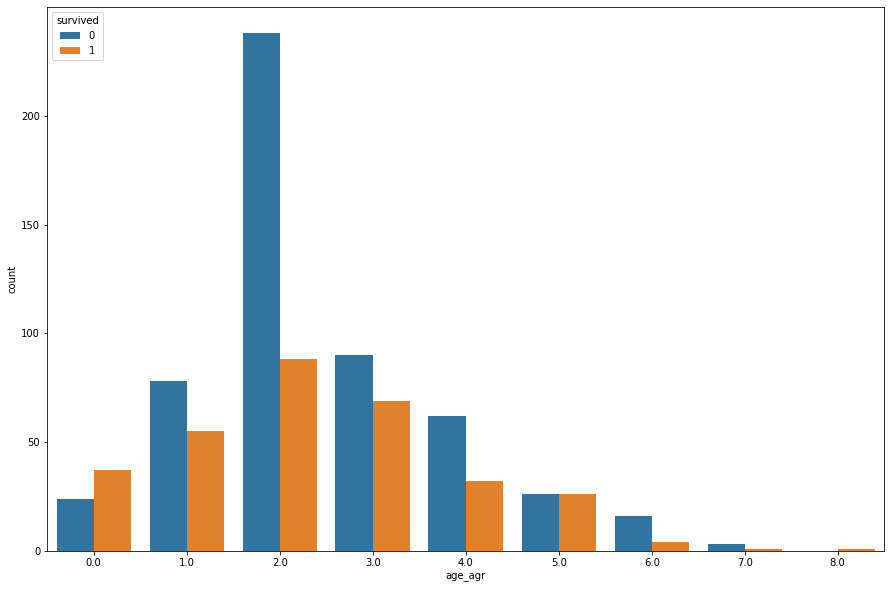

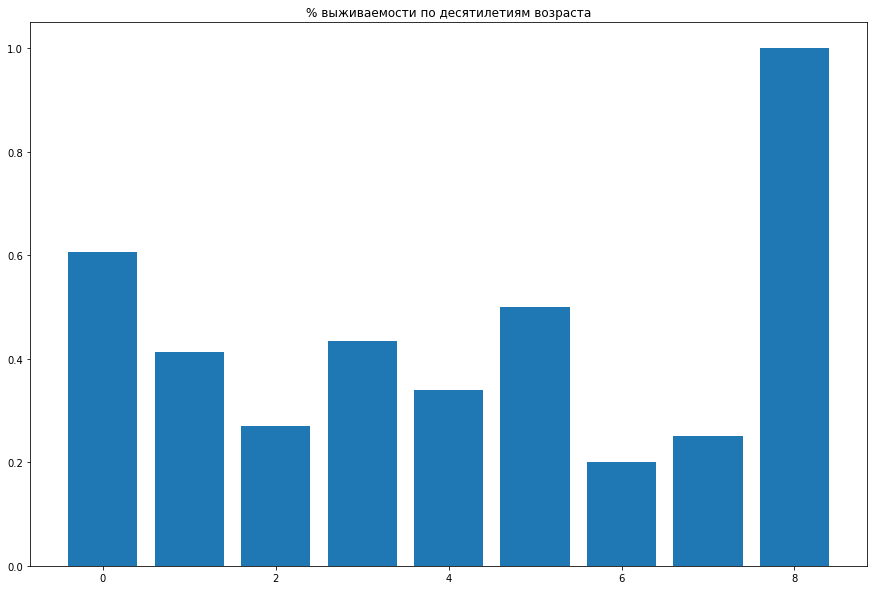

In [ ]:
df['age_agr'] = df.age // 10
df_test['age_agr'] = df_test.age // 10

sns.countplot(x = 'age_agr', hue = 'survived', data = df)
plt.show()

plt.bar([j for j in range(9)], 
        ([len(df[(df.age_agr == j) & (df.survived == 1)]) / len(df[df.age_agr == j]) for j in range(9)]))
plt.title('% выживаемости по десятилетиям возраста')
plt.show()

---

### Замена недостающих значений

Можно использовать некоторый дефолтный плейсхолдер для пропусков, например, новую категорию _MISSING_ для категориальных признаков или число -999 для числовых.

Таким образом, мы сохраняем данные о пропущенных значениях, что тоже может быть ценной информацией.

---

Заменим пропущенные значения показателя ***cabin***.

Как мы отмечали ранее, в этом показателе для нас важно само наличие записи, а не ее значение. Поэтому мы заполним показатель следующим образом:
- 1, если запись есть,
- 0, если запись отсутствует:

In [ ]:
df.cabin[df.cabin.isna() == False] = 1
df.cabin[df.cabin.isna()] = 0
df_test.cabin[df_test.cabin.isna() == False] = 1
df_test.cabin[df_test.cabin.isna()] = 0

---

Все пропущенные значения заполнены. Убедимся в этом:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     850 non-null    int64  
 1   pclass           850 non-null    int64  
 2   name             850 non-null    object 
 3   sex              850 non-null    object 
 4   age              850 non-null    float64
 5   sibsp            850 non-null    int64  
 6   parch            850 non-null    int64  
 7   ticket           850 non-null    object 
 8   fare             850 non-null    float64
 9   cabin            850 non-null    object 
 10  embarked         850 non-null    object 
 11  survived         850 non-null    int64  
 12  rate_per_person  850 non-null    float64
 13  age_agr          850 non-null    float64
 14  surname          850 non-null    object 
 15  title            850 non-null    object 
 16  aristocrat       850 non-null    int64  
 17  rev             

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     459 non-null    int64  
 1   pclass           459 non-null    int64  
 2   name             459 non-null    object 
 3   sex              459 non-null    object 
 4   age              459 non-null    float64
 5   sibsp            459 non-null    int64  
 6   parch            459 non-null    int64  
 7   ticket           459 non-null    object 
 8   fare             459 non-null    float64
 9   cabin            459 non-null    object 
 10  embarked         459 non-null    object 
 11  rate_per_person  459 non-null    float64
 12  surname          459 non-null    object 
 13  title            459 non-null    object 
 14  aristocrat       459 non-null    int64  
 15  rev              459 non-null    int64  
 16  age_agr          459 non-null    float64
dtypes: float64(4), i

---

# 2. Нетипичные данные (выбросы)

[Выбросы](https://en.wikipedia.org/wiki/Outlier) – это данные, которые существенно отличаются от других наблюдений. Они могут соответствовать реальным отклонениям, но могут быть и просто ошибками.

## Обнаружение выбросов

Для численных и категориальных признаков используются разные методы изучения распределения, позволяющие обнаружить выбросы.

### Гистограмма/коробчатая диаграмма

Если признак численный, можно построить гистограмму или коробчатую диаграмму (ящик с усами). 

Рассмотрим метод на признаке ***rate_per_person***:

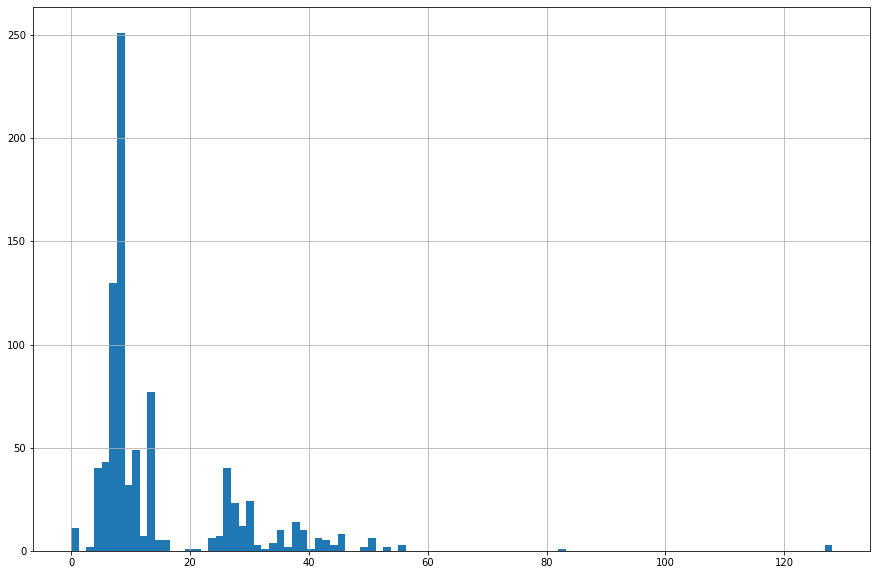

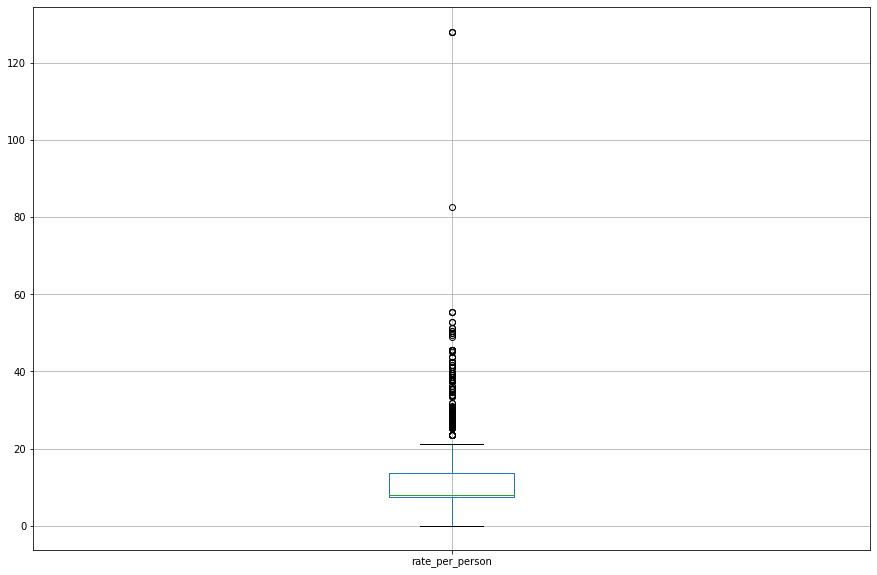

In [ ]:
df.rate_per_person.hist(bins=100)
plt.show()
df.boxplot('rate_per_person')
plt.show()

---

По гистограмме можно уверенно говорить, что все, что больше 60, является выбросом. 

Ящик с усами показывает, что на самом деле выбросы начинаются примерно со значения 22.

Проведенный анализ не совсем корректен. Мы с вами знаем, что разные классы кают имеют разную стоимость и неравномерное количество заселенных в них пассажиров. Анализ необходимо проводить в разрезе классов кают.

Однако для демонстрации метода такой подход достаточен.

---

### Описательная статистика

Отклонения численных признаков могут быть слишком четкими, чтобы не визуализироваться коробчатой диаграммой. Вместо этого можно проанализировать их описательную статистику:

In [ ]:
df.rate_per_person.describe()

count    850.000000
mean      14.481428
std       13.309451
min        0.000000
25%        7.550000
50%        8.050000
75%       13.718775
max      128.082300
Name: rate_per_person, dtype: float64

---

Мы видим, что отклонение максимума от 75% квантиля превышает 8 стандартных отклонений - это однозначно выброс. Корректность проведенного анализа полностью совпадает с предыдущим пунктом.

И ящик и описательная статистика не показывают нам, что значение 0 - это тоже выброс, но на кластерах мы это увидим.

---

### Столбчатая диаграмма

Для категориальных признаков можно построить столбчатую диаграмму – для визуализации данных о категориях и их распределении.

В качестве примера здесь можно было бы привести ситуацию с обращениями (признак title) до момента объединения различных обращений в 4 группы. Столбчатая диаграмма показала бы, что, например, обращение Don является выбросом. Сгруппировав обращения, мы, тем самым, применили один из методов управления выбросами.

---

### Прочие методы

Для обнаружения выбросов можно использовать другие методы, например, построение точечной диаграммы, z-оценку или кластеризацию.

---

### Расчет нижней и верхней границы для определения выбросов (усы)

Напишем функцию, которая позволит получать значения усов коробчатой диаграммы:

In [ ]:
def moustache(s):
    q75,q25 = np.percentile(s,[75,25])
    iqr = q75 - q25
    return q25 - 1.5*iqr, q75 + 1.5*iqr

## Управление выбросами

Выбросы довольно просто обнаружить, но выбор способа их устранения слишком существенно зависит от специфики набора данных и целей проекта. Их обработка во многом похожа на обработку пропущенных данных. Можно удалить записи или признаки с выбросами, либо скорректировать их, либо оставить без изменений.

В нашей задаче есть два признака с выбросами - это ***age*** и ***rate_per_person***.

Рассмотрим признак ***age***:

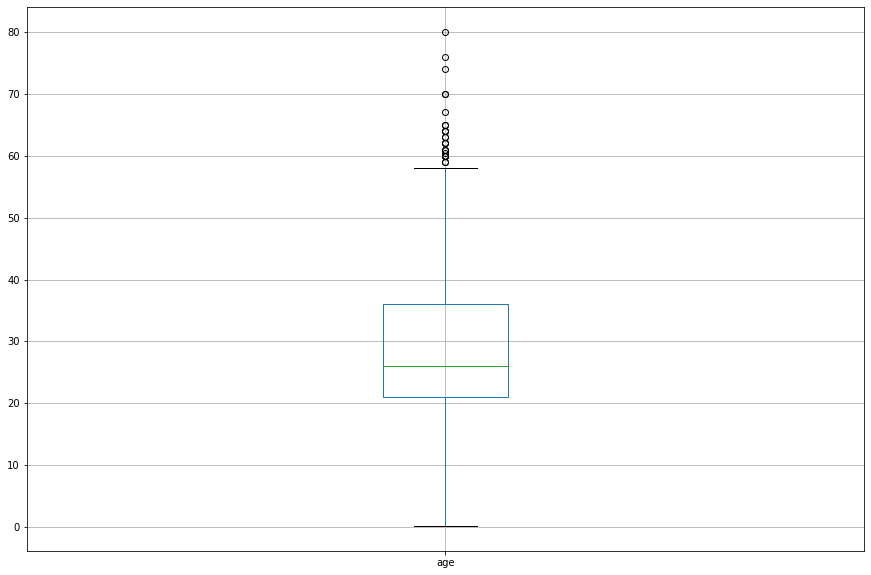

In [ ]:
df.boxplot('age')
plt.show()

In [ ]:
moustache(df.age)

(-1.5, 58.5)

---

Все пассажиры старше 58.5 - это выбросы. При этом мы считаем, что информация достоверная и значительно влияет на анализ выживаемости пассажиров. Следовательно, мы не можем ни удалить, ни скорректировать данную информацию. Остается только одно, группировать.

Мы уже сгруппировали по десятилетиям (***age_agr***). Посмотрим, удалось ли избавиться от выбросов:

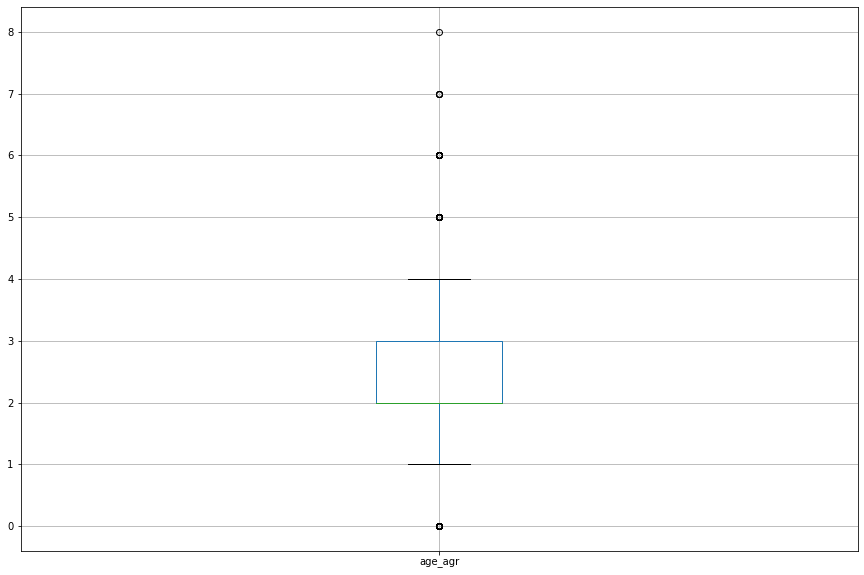

In [ ]:
df.boxplot('age_agr')
plt.show()

---

Результат был ожидаем, выбросы не устранены. 

Вспомним еще об одной проблеме, связанной с возрастом пассажиров:

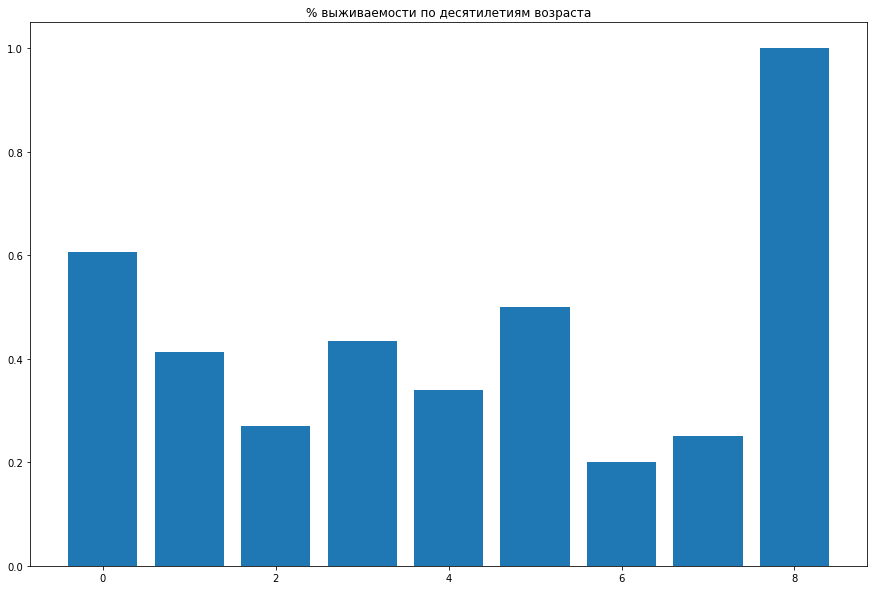

In [ ]:
plt.bar([j for j in range(9)], 
        ([len(df[(df.age_agr == j) & (df.survived == 1)]) / len(df[df.age_agr == j]) for j in range(9)]))
plt.title('% выживаемости по десятилетиям возраста')
plt.show()

---

Модели будет тяжело работать с этим признаком в виду его немонотонности. С увеличением возраста выживаемость то падает, то возрастает, при этом происходит это не линейно. 

Решением обеих проблем является формирование серии признаков, в которых бинарно оценивается принадлежность пассажира к определенному возрасту. Так как распределение выживаемости у мужчин и женщин различается, то и возрастные признаки лучше строить по-отдельности.

Рассмотрим распределение выживаемости у женщин:

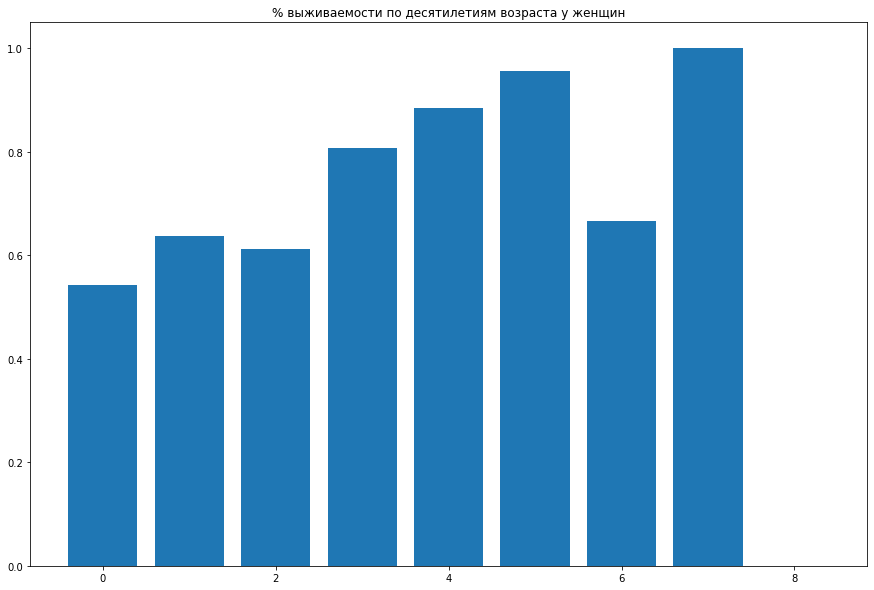

In [ ]:
slz = df[df.sex == 'female']
plt.bar([j for j in range(9)], 
        ([len(slz[(slz.age_agr == j) & (slz.survived == 1)]) / max(1,len(slz[slz.age_agr == j])) 
          for j in range(9)]))
plt.title('% выживаемости по десятилетиям возраста у женщин')
plt.show()

---

В данном случае предлагается разделить на два признака:
1. Женщины, попадающие в категории 0, 1, 2 и 6;
2. Остальные женщины.

Рассмотрим распределение у мужчин:

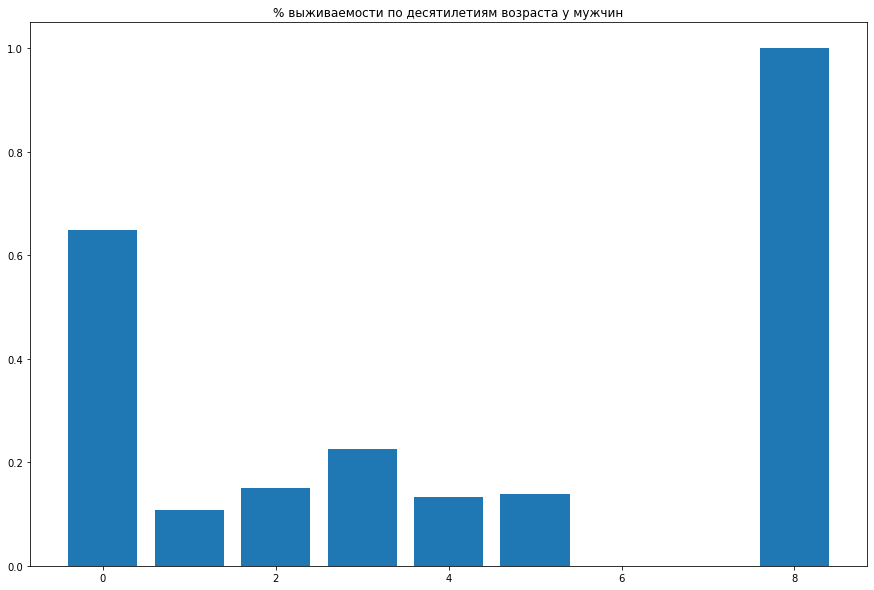

In [ ]:
slz = df[df.sex == 'male']
plt.bar([j for j in range(9)], 
        ([len(slz[(slz.age_agr == j) & (slz.survived == 1)]) / max(1,len(slz[slz.age_agr == j])) 
          for j in range(9)]))
plt.title('% выживаемости по десятилетиям возраста у мужчин')
plt.show()

---

Не понятна ситуация с категориями 6 и 7. Посмотрим на другой гистограмме:

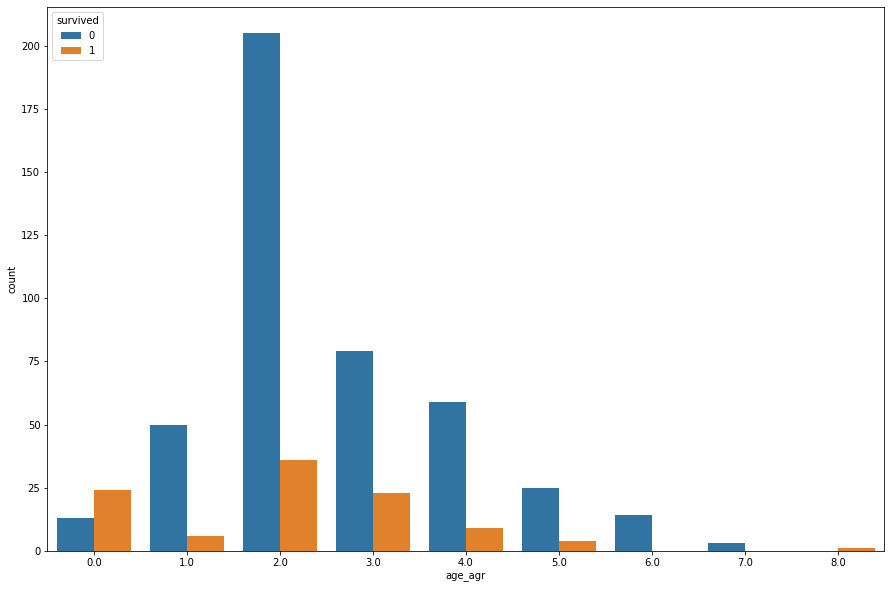

In [ ]:
sns.countplot(x = 'age_agr', hue = 'survived', data = df[df.sex == 'male'])
plt.show()

---

В 6 и 7 категории выживших не было. Однако они могут быть в тестовой выборке. С 8 категорией тоже проблема, оба представителя выжили, что может отличаться от тестовой выборки. Категории малочислены, поэтому их можно объединить в одну категорию.

Предлагается разделить на четыре признака:
1. Дети из категории 0;
2. Мужчины из категорий 1, 2, 3, 4, 5;
3. Остальные мужчины.

Создадим признаки fn и mn (расшифровка f - female, m - male, n - номер признака в соответствии с описанием):

In [ ]:
df.age_agr = df.age_agr.astype('int64')
f = [[0, 1, 2, 6],
     [3, 4, 5, 7, 8, 9]]
m = [[0],
     [1, 2, 3, 4, 5],
     [6, 7, 8, 9]]

def signs(df, col, chapter, meaning, s):
    for j in range(len(s)):
        df[meaning[0]+str(j+1)] = 0
        df[meaning[0]+str(j+1)][(df[chapter] == meaning) & (df[col].isin(s[j]))] = 1
    return df

df = signs(df, 'age_agr', 'sex', 'female', f)
df = signs(df, 'age_agr', 'sex', 'male', m)
df_test = signs(df_test, 'age_agr', 'sex', 'female', f)
df_test = signs(df_test, 'age_agr', 'sex', 'male', m)

----

Проблема выбросов в признаке ***age*** решена. При расчетах была добавлена 9 категория, на случай наличия в тестовой выборке пассажира старше 90 лет.

---

Рассмотрим признак ***rate_per_person***: 

Ранее, заполняя пропущенные значения признака fare мы обращали внимание на то, что стоимость билета может зависеть от множества факторов, из которых нам достуны только два - это класс каюты и порт отправления. Следовательно управлять выбросами необходимо в разрезе именно этих двух факторов.

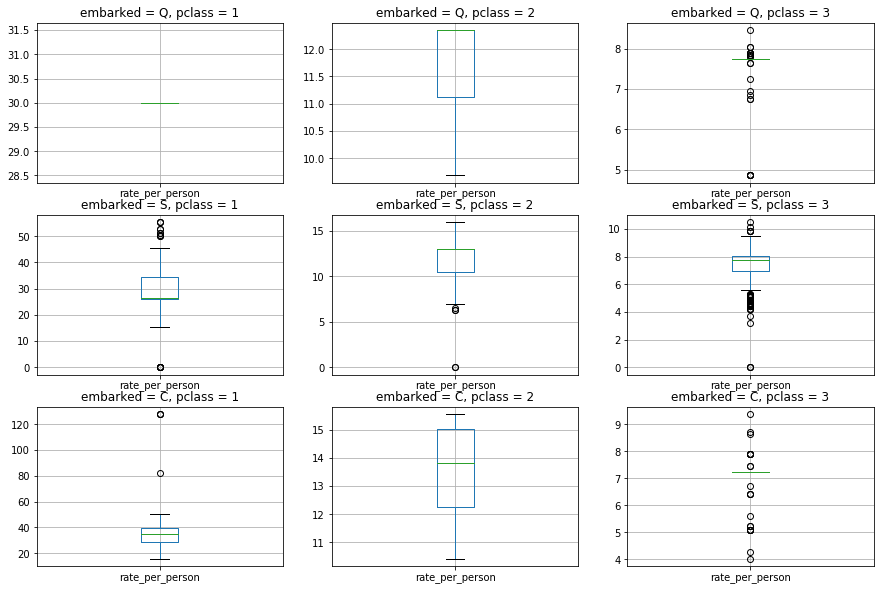

In [ ]:
for i, embarked in enumerate(df.embarked.unique()):
    for j in range(1, 4):
        plt.subplot (3, 3, i*3 + j)
        df[(df.embarked == embarked) & (df.pclass == j)].boxplot('rate_per_person')
        plt.title('embarked = '+embarked+', pclass = '+str(j))

---

Перед дальнейшим анализом стоит упомянуть, что признак rate_per_person может содержать ошибки. Это связано с тем, что на Титанике было 1317 пассажиров, а совокупное количество пассажиров в датасете составляет 1309. Ошибка составляет менее 1%, и на агрегированных данных будет нивелирована.

---

Для дальнейшего анализа необходимо создать таблицы, описывающие выбросы по кластерам с точки зрения выживаемости. Будут рассматриваться отдельно выбросы сверху и снизу. При этом выбросы равные 0 не будут рассматриваться. Есть три категории пассажиров, стоимость билетов которых равна нулю:
1. Гости Титаника, например, конструктор Титаника [Andrews, Mr. Thomas Jr](https://ru.wikipedia.org/wiki/Эндрюс,_Томас) (хотя формально он и Chisholm, Mr. Roderick Robert Crispin находились на Титанике как представители компании-судостроителя);
2. Во втором классе находились наблюдатели от компании-судостроителя, например, [Cunningham, Mr. Alfred Fleming](https://www.encyclopedia-titanica.org/titanic-victim/alfred-fleming-cunningham.html);
3. В третьем классе сотрудники параходной компании, возвращающиеся домой, например, [Tornquist, Mr. William Henry](https://www.encyclopedia-titanica.org/titanic-survivor/william-henry-tornquist.html).

Создадим и проанализируем таблицы:



In [ ]:
col = ['Количество наблюдений', 'Количество выбросов', 'Доля выбросов', 'Выживаемость', 'Выживаемость выбросов', 
       'Выживаемость без выбросов']
up_outliers = pd.DataFrame(index=col)

def up_outliers_analysis(e, pc, df):
    result = []
    df = df[(df.embarked == e) & (df.pclass == pc)]
    result.append(len(df))
    result.append(len(df[df.rate_per_person > max(moustache(df.rate_per_person))]))
    result.append(round(result[1] / result[0], 4))
    result.append(round(df.survived.sum() / result[0], 4))
    result.append(round(df.survived[df.rate_per_person > max(moustache(df.rate_per_person))].sum() / 
                        max(1, result[1]), 4))
    result.append(round(df.survived[df.rate_per_person <= max(moustache(df.rate_per_person))].sum() / 
                        (result[0] - result[1]), 4))
    return result
    
for j in range(1, 4):    
    for i, embarked in enumerate(df.embarked.unique()):
        up_outliers[embarked+str(j)] = up_outliers_analysis(embarked, j, df)
up_outliers = up_outliers.T
up_outliers

,Количество наблюдений,Количество выбросов,Доля выбросов,Выживаемость,Выживаемость выбросов,Выживаемость без выбросов
Q1,2.0,0.0,0.0000,1.0000,0.0000,1.0000
S1,111.0,10.0,0.0901,0.5405,0.4000,0.5545
C1,93.0,4.0,0.0430,0.6774,1.0000,0.6629
Q2,6.0,0.0,0.0000,0.3333,0.0000,0.3333
S2,144.0,0.0,0.0000,0.4514,0.0000,0.4514
C2,16.0,0.0,0.0000,0.5625,0.0000,0.5625
Q3,76.0,12.0,0.1579,0.3289,0.3333,0.3281
S3,335.0,6.0,0.0179,0.2030,0.1667,0.2036
C3,67.0,10.0,0.1493,0.2836,0.3000,0.2807


In [ ]:
down_outliers = pd.DataFrame(index=col)

def down_outliers_analysis(e, pc, df):
    result = []
    df = df[(df.embarked == e) & (df.pclass == pc) & (df.rate_per_person != 0)]
    result.append(len(df))
    result.append(len(df[df.rate_per_person < min(moustache(df.rate_per_person))]))
    result.append(round(result[1] / result[0], 4))
    result.append(round(df.survived.sum() / result[0], 4))
    result.append(round(df.survived[df.rate_per_person < min(moustache(df.rate_per_person))].sum() / 
                        max(1, result[1]), 4))
    result.append(round(df.survived[df.rate_per_person >= min(moustache(df.rate_per_person))].sum() / 
                        (result[0] - result[1]), 4))
    return result
    
for j in range(1, 4):    
    for i, embarked in enumerate(df.embarked.unique()):
        down_outliers[embarked+str(j)] = down_outliers_analysis(embarked, j, df)
down_outliers = down_outliers.T
down_outliers

,Количество наблюдений,Количество выбросов,Доля выбросов,Выживаемость,Выживаемость выбросов,Выживаемость без выбросов
Q1,2.0,0.0,0.0000,1.0000,0.0000,1.0000
S1,105.0,0.0,0.0000,0.5619,0.0000,0.5619
C1,93.0,0.0,0.0000,0.6774,0.0000,0.6774
Q2,6.0,0.0,0.0000,0.3333,0.0000,0.3333
S2,142.0,3.0,0.0211,0.4577,0.6667,0.4532
C2,16.0,0.0,0.0000,0.5625,0.0000,0.5625
Q3,76.0,12.0,0.1579,0.3289,0.0000,0.3906
S3,332.0,37.0,0.1114,0.2048,0.2432,0.2000
C3,67.0,14.0,0.2090,0.2836,0.5714,0.2075


---

По результатам проведенного анализа делаем вывод, что выбросы могут быть значимы с точки зрения выживаемости. Однако выбросы второго класса не будут считаться таковыми при сравнении с первым и третьим классом. Поэтому необходимо разделить столбец на три признака, относительно принадлежности к классам кают. Нулевые стоимости следует заполнить средними значениями относительно новых признаков:

In [ ]:
for j in range(1,4):
    df['price' + str(j)] = np.nan
    df['price' + str(j)][df.pclass == j] = df.rate_per_person[df.pclass == j]
    df['price' + str(j)][df['price' + str(j)] == 0] = df.rate_per_person[(df.pclass == j) & 
                                                                         (df.rate_per_person !=0)].mean()
    df['price' + str(j)][df['price' + str(j)].isna()] = 0
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,rate_per_person,age_agr,surname,title,aristocrat,rev,f1,f2,m1,m2,m3,price1,price2,price3
0,1216,3,"Smyth, Miss. Julia",female,18.0,0,0,335432,7.7333,0,Q,1,7.7333,1,Smyth,Miss,0,0,1,0,0,0,0,0.0,0.0,7.7333
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,0,S,0,8.6625,3,Cacic,Mr,0,0,0,0,0,1,0,0.0,0.0,8.6625
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,0,S,0,8.0500,3,Van Impe,Mrs,0,0,0,1,0,0,0,0.0,0.0,8.0500
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,0,S,1,11.5000,5,Hocking,Mrs,0,0,0,1,0,0,0,0.0,11.5,0.0000
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,0,S,0,13.0000,4,Veal,Mr,0,0,0,0,0,1,0,0.0,13.0,0.0000


In [ ]:
for j in range(1,4):
    df_test['price' + str(j)] = np.nan
    df_test['price' + str(j)][df_test.pclass == j] = df_test.rate_per_person[df_test.pclass == j]
    df_test['price' + str(j)][df_test['price' + str(j)] == 0] = df_test.rate_per_person[(df.pclass == j) & 
                                                                         (df_test.rate_per_person !=0)].mean()
    df_test['price' + str(j)][df_test['price' + str(j)].isna()] = 0
df_test.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,rate_per_person,surname,title,aristocrat,rev,age_agr,f1,f2,m1,m2,m3,price1,price2,price3
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,1,C,27.7208,Thayer,Mr,0,0,1.0,0,0,0,1,0,27.7208,0.0,0.0000
1,1150,3,"Risien, Mr. Samuel Beard",male,26.0,0,0,364498,14.5000,0,S,7.2500,Risien,Mr,0,0,2.0,0,0,0,1,0,0.0000,0.0,7.2500
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,1,S,26.0000,Davidson,Mr,0,0,3.0,0,0,0,1,0,26.0000,0.0,0.0000
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,0,S,7.1250,Nirva,Mr,0,0,4.0,0,0,0,1,0,0.0000,0.0,7.1250
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,0,S,7.8958,Minkoff,Mr,0,0,2.0,0,0,0,1,0,0.0000,0.0,7.8958


---

Работа с выбросами окончена.

---

## 3. Неинформативные признаки

Если признак имеет слишком много строк с одинаковыми значениями, он может не обладать полезной информацией для проекта.

### Обнаружение

Следующий код проверит все признаки на предмет содержания одинаковых значений в 95% наблюдений и более:

In [ ]:
num_rows = len(df)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

aristocrat: 98.94%
0    841
1      9
Name: aristocrat, dtype: int64

rev: 99.53%
0    846
1      4
Name: rev, dtype: int64

m1: 95.65%
0    813
1     37
Name: m1, dtype: int64

m3: 97.88%
0    832
1     18
Name: m3, dtype: int64



---

### Управление

Если после анализа причин получения повторяющихся значений вы пришли к выводу, что признак не несет полезной информации, то удалите его.

В нашей задаче признаки несут полезную информацию.

---

Временно сделаем паузу в изучении очистки данных. Закончим обработку данных нашей задачи. И для этого разберемся с признаками sibsp и parch. Объединим их в признак family:

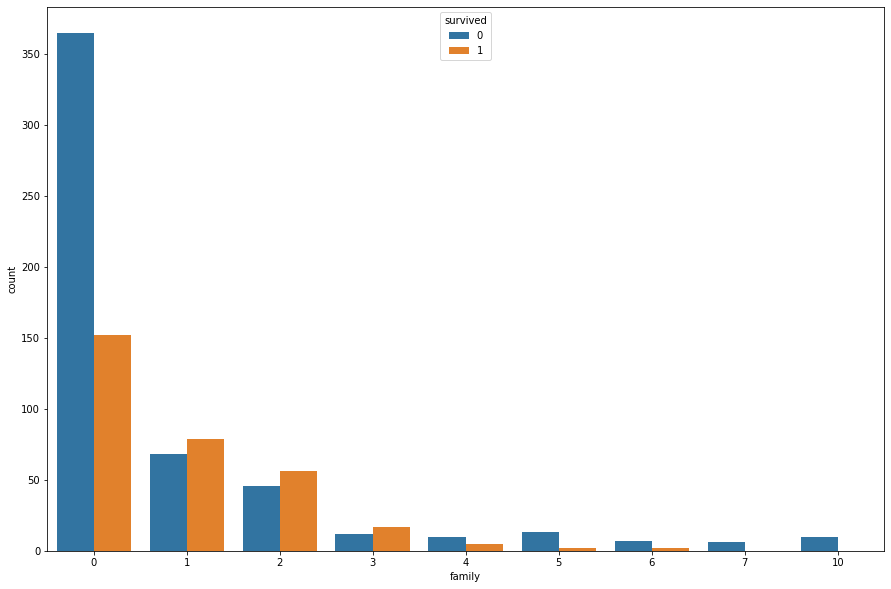

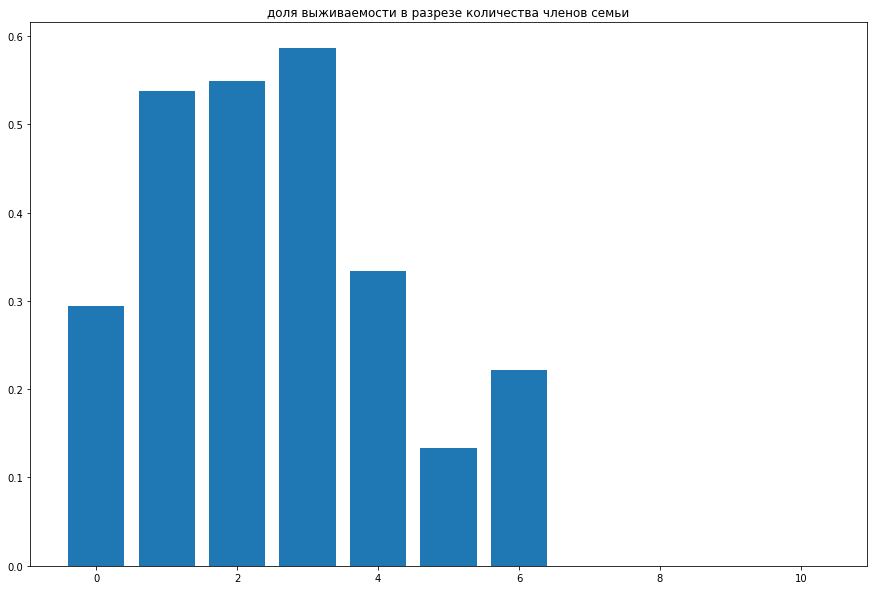

In [ ]:
df['family'] = df.sibsp + df.parch

sns.countplot(x = 'family', hue = 'survived', data = df)
plt.show()

plt.bar([j for j in range(df.family.max()+1)], 
        ([len(df[(df.family == j) & (df.survived == 1)]) / 
          max(1, len(df[df.family == j])) for j in range(df.family.max()+1)]))
plt.title('доля выживаемости в разрезе количества членов семьи')
plt.show()

---

Семьи из 2, 3 и 4 человек демонстрируют большую склонность к выживанию. Сформируем из признака family два новых признака:
- family1 - принадлежность пассажира к семьям из 2,3 или 4 человек;
- family2 - остальные пассажиры:

In [ ]:
df['family1'] = 0
df.family1[df.family.isin([1,2,3])] = 1
df['family2'] = 1 - df.family1

In [ ]:
df_test['family'] = df_test.sibsp + df_test.parch
df_test['family1'] = 0
df_test.family1[df_test.family.isin([1,2,3])] = 1
df_test['family2'] = 1 - df_test.family1

---

Остались категориальные признаки pclass, embarked и title:

In [ ]:
for d in [df, df_test]:
    for j in ['pclass', 'embarked', 'title']:
        for i in d[j].unique():
            d[str(i)] = 0
            d[str(i)][d[j] == i] = 1

---

Сформируем список col, в который запишем те столбцы, которые будут участвовать в разработке модели:

In [ ]:
col = ['Miss','Mr', 'Mrs','Master','aristocrat','rev','f1','f2','m1','m2','m3','cabin','price1','price2','price3',
       'family1','family2','3','2','1','Q','S','C']

---

## 4. Нерелевантные признаки

Нерелевантные признаки обнаруживаются ручным отбором и оценкой значимости. Например, признак, регистрирующий температуру воздуха в Торонто точно не имеет никакого отношения к прогнозированию цен на российское жилье. Если признак не имеет значения для проекта, его нужно исключить.

---

## 5. Дубликаты записей

Если значения признаков (всех или большинства) в двух разных записях совпадают, эти записи называются дубликатами.

### Обнаружение дубликатов

Способ обнаружения дубликатов зависит от того, что именно мы считаем дубликатами. Например, если в наборе данных есть уникальный идентификатор id, то две записи, имеющие одинаковый id, мы считаем одной и той же записью.

Если нас интересуют одинаковые наборы значений всех признаков, то дубликаты можно выявить с помощью [duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html):

In [ ]:
df[df.duplicated()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,rate_per_person,age_agr,surname,title,aristocrat,rev,f1,f2,m1,m2,m3,price1,price2,price3,family,family1,family2,3,2,1,Q,S,C,Miss,Mr,Mrs,Master


---

Дубликатов не выявлено. Каждый ID пассажира является уникальной записью, поэтому полного совпадения строк нет.

---

Если нас интересует выявить неуникальные наборы по некоторым ключевым признакам, то необходимо сформировать ключ из признаков и применить его в  duplicated(). Параметр *keep* имеет три значения:
- 'first' - первая дублируемая запись считается уникальной;
- ‘last’ - последняя дублируемая запись считается уникальной;
- False - все дублирующие записи считаются неуникальными.

В признаках, подготовленных для обучения модели, дубликаты определяются так:

In [ ]:
key = col + ['survived']

df[col][df.duplicated(key, keep='first')]

,Miss,Mr,Mrs,Master,aristocrat,rev,f1,f2,m1,m2,m3,cabin,price1,price2,price3,family1,family2,3,2,1,Q,S,C
25,0,1,0,0,0,0,0,0,0,1,0,0,0.0,13.0,0.0000,0,1,0,1,0,0,1,0
41,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0,7.5500,0,1,1,0,0,0,1,0
49,0,1,0,0,0,0,0,0,0,1,0,0,0.0,13.0,0.0000,0,1,0,1,0,0,1,0
51,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0,7.2292,0,1,1,0,0,0,0,1
55,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0,7.8958,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,1,0,0,0,0,0,0,0,1,0,0,0.0,13.0,0.0000,0,1,0,1,0,0,1,0
840,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,5.0819,1,0,1,0,0,0,0,1
842,1,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,7.7500,0,1,1,0,0,1,0,0
845,0,1,0,0,0,0,0,0,0,1,0,1,50.0,0.0,0.0000,0,1,0,0,1,0,1,0


---

342 записи являются дублирующими.

---

### Управление дубликатами

Для многих задач единственно верное управление - это удаление дубликатов. Для этого можно использовать [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html?highlight=drop_duplicates#pandas.DataFrame.drop_duplicates)

Однако, удаление дубликатов не всегда применяется. И даже наоборот, существует методика, когда для балансировки классов, в условиях небольшого количества наблюдений, случайным образом формируются дубли.

Мы не будем удалять дубликаты в нашей задаче по двум причинам:
1. Большинство дубликатов - это следствие наших действий по группировке данных.
2. Удаление дубликатов в нашей задаче способно привести к неопределенности в определении моделью класса.

Рассмотрим второе утверждение на примере:

In [ ]:
X_tr = np.array([[1, 1, 0, 1],      # Создаем 4 наблюдения по 4 признакам. Все записи в наблюдениях идентичны. 
                 [1, 1, 0, 1],      # Это будет выборка для обучения
                 [1, 1, 0, 1],
                 [1, 1, 0, 1]]) 
X_te = np.array([[1, 1, 0, 1],      # Такие же идентичные наблюдения, но только два - тестовая выборка.
                 [1, 1, 0, 1]])
y_tr = np.array([1,0,0,0])          # Метки классов для обучающей выборки.
y_te = np.array([1,0])              # Метки классов для тестовой выборки.
lr = LogisticRegression(random_state=21)
lr.fit(X_tr, y_tr)                  # Обучаем модель
lr.predict_proba(X_te)              # Выводим вероятности принадлежности к классу для тестовой выборки:
                                    # Первый столбец - вероятности принадлежности к классу с меткой 0

array([[0.74999912, 0.25000088],
       [0.74999912, 0.25000088]])

---

Ожидаемый результат. Так как было 4 одинаковых объекта, но лишь 1 принадлежал к классу 1, то вероятность, что подобный объект принадлежит к классу 0 составляет 0.75.

Теперь удалим дубликаты и посмотрим на результат:

In [ ]:
X_tr = np.array([[1, 1, 0, 1],
                 [1, 1, 0, 1]]) 
X_te = np.array([[1, 1, 0, 1],
                 [1, 1, 0, 1]])
y_tr = np.array([1,0]) 
y_te = np.array([1,0])
lr = LogisticRegression(random_state=21)
lr.fit(X_tr, y_tr)
lr.predict_proba(X_te)

array([[0.5, 0.5],
       [0.5, 0.5]])

---

Объекты для модели стали равнозначны и мы получаем неопределенность с точки зрения отнесения их к классу.

Мы строим модель из предположения, что у большинства похожих пассажиров похожая судьба, поэтому не будем удалять дубликаты.

---

## 6. Некоторые методы очистки строковых данных

Большая проблема очистки данных – разные форматы записей. Для корректной работы модели важно, чтобы набор данных соответствовал определенным стандартам – необходимо тщательное исследование с учетом специфики самих данных. Мы рассмотрим четыре самых распространенных несогласованности:

- Разные регистры символов.
- Разные форматы данных (например, даты).
- Опечатки в значениях категориальных признаков.
- Адреса.

---

### 6.1. Разные регистры символов

Непоследовательное использование разных регистров в категориальных значениях является очень распространенной ошибкой, которая может существенно повлиять на анализ данных.

**Выявление**

Выявить можно с помощью ***value_couts()*** в случае приемлимого количества значений. Но лучше сразу управлять.

**Управление**

Используйте ***str.lower()*** для перевода всех букв признака в нижний регистр.

---

### 6.2. Разные форматы данных

Ряд данных в наборе находится не в том формате, с которым нам было бы удобно работать. Например, даты, записанные в виде строки, следует преобразовать в формат DateTime. Преобразованием строки даты в данные, которые можно применять, мы уже занимались. Проблему могут представлять строки дат, записанных в разных форматах, например:
- dd.mm.yyyy
- dd.mm.yy
- yy.dd.mm...

В этом случае:
- необходимо определиться с периодом, что позволит определить года и/или месяца;
- помнить, что в году 12 месяцев;
- в случае невозможности определения, например, 02-04-08, посмотреть соседние даты, возможно они упорядочены.
- попытаться определить переменную(ые), связанную со временем и на ее основе провести кластеризацию.
- определить информативность времени для решения задачи, возможно это нерелевантный признак.

---

### 6.3. Опечатки

Опечатки в значениях категориальных признаков приводят к таким же проблемам, как и разные регистры символов. обрабатывать опечатки - длительное занятие. Однако в случае небольшого количества данных - выполнимое.

**Выявление**

Для обнаружения опечаток требуется особый подход. В нашем наборе данных опечаток нет, поэтому для примера создадим новый набор. В нем будет признак city, а его значениями будут torontoo и tronto. В обоих случаях это опечатки, а правильное значение – toronto.

Простой способ идентификации подобных элементов – нечеткая логика или редактирование расстояния. Суть этого метода заключается в измерении количества букв (расстояния), которые нам нужно изменить, чтобы из одного слова получить другое.

Предположим, нам известно, что в признаке city должно находиться одно из четырех значений: toronto, vancouver, montreal или calgary. Мы вычисляем расстояние между всеми значениями и словом toronto (и vancouver).

Те слова, в которых содержатся опечатки, имеют меньшее расстояние с правильным словом, так как отличаются всего на пару букв. для поиска дистанции воспользуемся [edit_distance](https://www.nltk.org/_modules/nltk/metrics/distance.html) библиотеки nltk.

In [ ]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,torontoo,1,8
1,toronto,0,8
2,tronto,1,8
3,vancouver,8,0
4,vancover,7,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


---

**Управление**

Можно установить критерии для преобразования опечаток в правильные значения.

Например, если расстояние некоторого значения от слова toronto не превышает 2 буквы, мы преобразуем это значение в  toronto.

In [ ]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,1,8
3,vancouver,8,0
4,vancouver,7,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8


---

### 6.4. Адреса

Адреса – ужасная головная боль для всех аналитиков данных - мало кто следует стандартному формату, вводя свой адрес в базу данных.

Проще предположить, что проблема разных форматов адреса точно существует, чем выявлять ее. Даже если визуально вы не обнаружили беспорядка в этом признаке, все равно стоит стандартизировать значения для надежности.

Создадим набор df_add_ex:

In [ ]:
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', 
                          '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


---

Минимальное форматирование включает следующие операции:

- приведение всех символов к нижнему регистру;
- удаление пробелов в начале и конце строки;
- удаление точек;
- стандартизация формулировок: замена street на st, apartment на apt и т. д.

In [ ]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip()
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') 
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') 
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') 
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') 

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave


---

Признак стал чище!

---

Невозможно рассказать про все проблемы с данными с которыми еще предстоит встретиться, невозможно рассмотреть все методы, когда-либо применявшиеся к очистке данных. Но рассмотренные примеры помогут в большинстве случаев.

---

Построим классификатор нашей задачи на основе логистической регрессии:

---

Сформируем данные для разработки и тестирования модели:

In [ ]:
X = df[col].values
y = df.survived.values
X_Test = df_test[col].values
y_Test = dg.survived.values

---

С этого момента Test с большой буквы означает тестовую выборку, а test с маленькой буквы - используемую для построения модели подвыборку данных для обучения.

---

Произведем нормирование данных так, чтобы нули оставались нулями. В результате преобразования, все значения в данных для обучения распределены на отрезке от 0 до 1:

In [ ]:
x_min = X.min(axis=0)
x_max = X.max(axis=0)
X = (X - x_min)/(x_max - x_min)
X_Test = (X_Test - x_min)/(x_max - x_min)

---

Посмотрим на отображение наших данных на плоскость с помощью t-SNE:

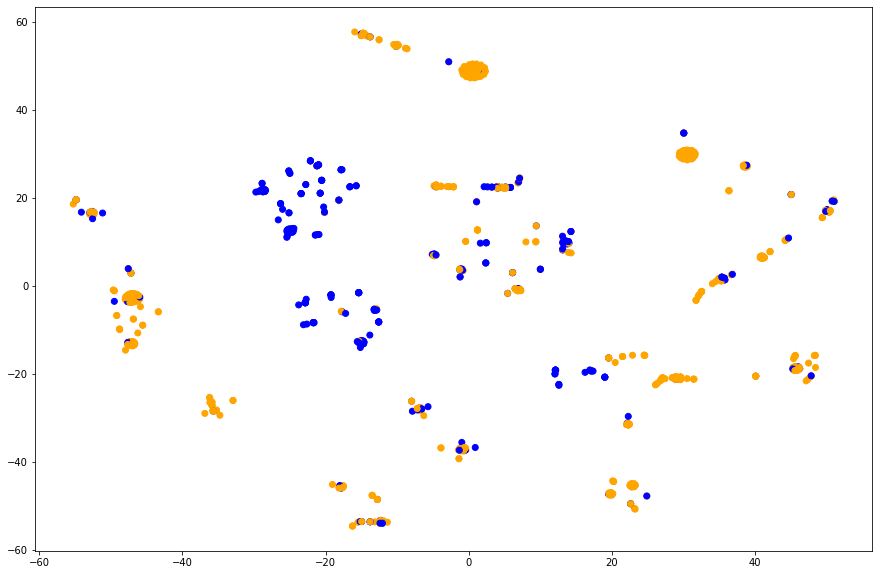

In [ ]:
tsne = TSNE(n_components=2, perplexity=15, random_state=21)
tsne_representation = tsne.fit_transform(X)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=df.survived.map({0: 'orange', 1: 'blue'}))
plt.show()

---

Наличие пересечений кластеров свидетельствует, что 100% точности модели нам не достигнуть.

---

Построим модель на основе логистической регрессии и оценим ее качество:

In [ ]:
"""Функция plot_confusion_matrix практически без изменений перекочевала из предыдущего дня"""

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
        thresh = 0.5   
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
lr = LogisticRegression(random_state=21)
lr.fit(X_train, y_train)
print(classification_report(y_train, lr.predict(X_train)))
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       369
           1       0.78      0.73      0.75       226

    accuracy                           0.82       595
   macro avg       0.81      0.80      0.81       595
weighted avg       0.82      0.82      0.82       595

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       168
           1       0.66      0.71      0.69        87

    accuracy                           0.78       255
   macro avg       0.75      0.76      0.76       255
weighted avg       0.78      0.78      0.78       255



---

Различие метрик на обучающей и тестовой выборках может говорить о переобучении модели. Посмотрим качество на отдельных данных:

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       292
           1       0.84      0.89      0.86       167

    accuracy                           0.90       459
   macro avg       0.88      0.89      0.89       459
weighted avg       0.90      0.90      0.90       459



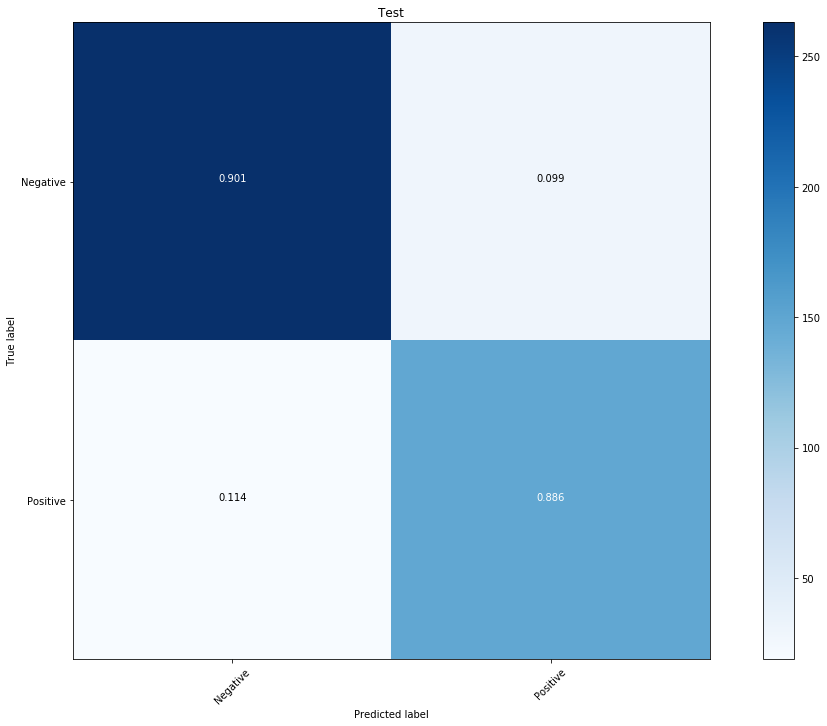

In [ ]:
print(classification_report(y_Test, lr.predict(X_Test)))
plot_confusion_matrix(confusion_matrix(y_Test, lr.predict(X_Test)), classes=['Negative', 'Positive'], 
                      title='Test', normalize=True)

---

Получился очень хороший результат по сравнению с выборкой для обучения. Попробуем разобраться в причинах этого. Посмотрим на тестовые данные с помощью t-SNE:

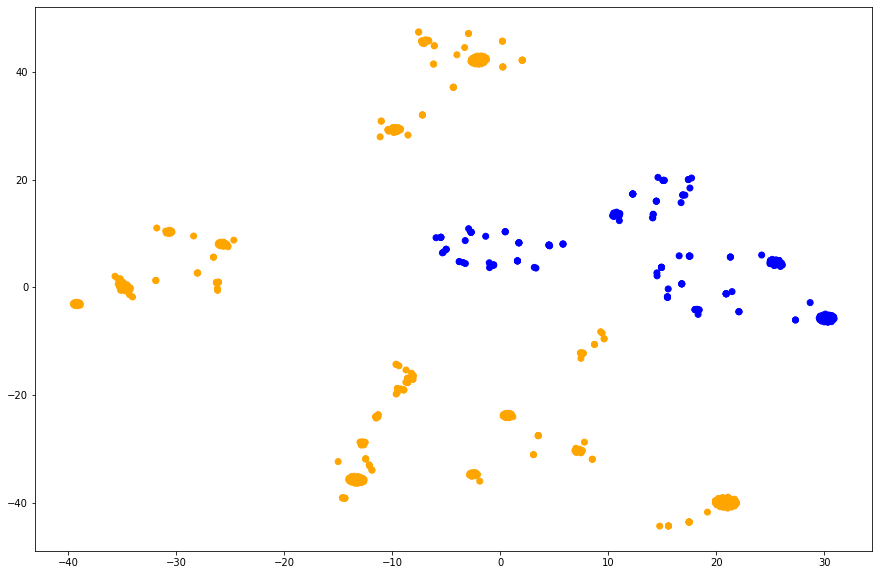

In [ ]:
tsne_representation = tsne.fit_transform(X_Test)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=dg.survived.map({0: 'orange', 1: 'blue'}))
plt.show()

---

Вот и ответ на вопрос - кластеры четко разделены, в результате возникает меньше неопределенности о принадлежности объекта классу.

---

Тестовые данные практически всегда будут показывать лучший результат, чем данные для обучения. Но это не дает нам ответ на вопрос, переобучена ли модель. Попробуем с этим разобраться.

Для начала напишем функцию viz_score(), которая поможет нам визуализировать результаты нашего анализа:

In [ ]:
def viz_score(data, legend=None, title=None, xlabel=None, ylabel=None, k=0):
    """data - список рядов значений графиков;
       k - номер первого элемента, отображаемого на оси абсцисс"""
    for j in data:
        plt.plot(np.arange(k,len(j)+k), j, marker='s')
    plt.legend(legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(np.arange(k, len(data[0]) + k + .1, 1))
    plt.show()

---

Проанализируем влияние random_state на метрики модели. Для этого напишем функцию *log_reg_analysis_random_state()*, которая собирает и визуализирует метрику accuracy при различных значениях random_state. Можно изменить в функции метрику, например, на f1_score.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def log_reg_analysis_random_state(X, y, viz=True, maxrs = 22):
    rs_train = []
    rs_test = []
    for random_state in range(maxrs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
        lr = LogisticRegression(random_state=21)
        lr.fit(X_train, y_train)
        rs_train.append(accuracy_score(y_train, lr.predict(X_train)))
        rs_test.append(accuracy_score(y_test, lr.predict(X_test)))
        
    if viz:
        viz_score([rs_train, rs_test], ['train', 'test'], 'random_state', 'random_state', 'accuracy_score', k=0)
    
    return np.array(rs_train), np.array(rs_test)

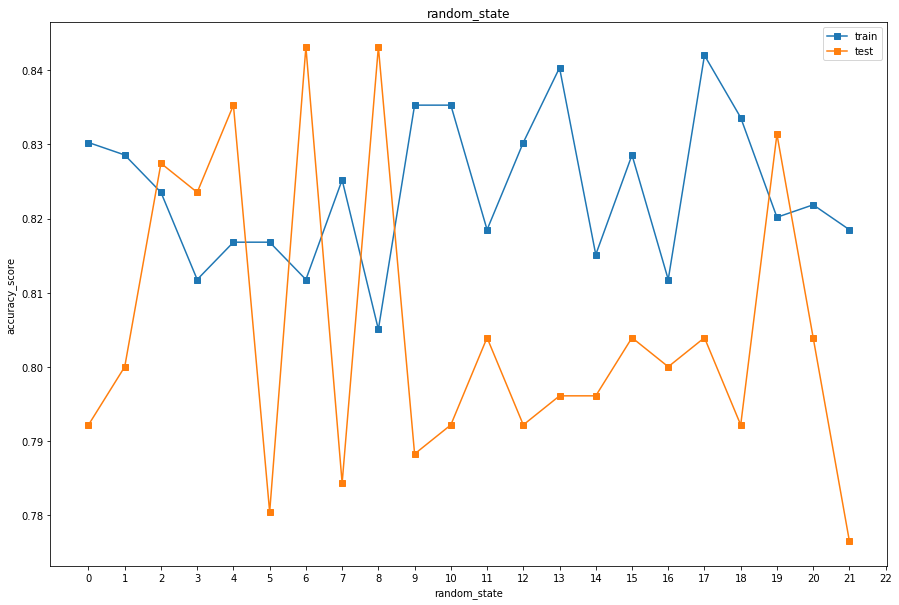

Значение среднего accuracy на подвыборке train -  0.82, на подвыборке test -  0.8, что на 2.27% меньше.
Значение стандартного отклонения на подвыборке train -  0.0098, на подвыборке test -  0.0195, что на 98.28% больше.


In [ ]:
a, b = log_reg_analysis_random_state(X, y)
print('Значение среднего accuracy на подвыборке train - ', str(round(a.mean(),2))+',', end=' ')
print('на подвыборке test - ', str(round(b.mean(),2))+',', end=' ')
print('что на', str(round(1 - b.mean()/a.mean(),4)*100)+'%', 'меньше.')
print('Значение стандартного отклонения на подвыборке train - ', str(round(a.std(),4))+',', end=' ')
print('на подвыборке test - ', str(round(b.std(),4))+',', end=' ')
print('что на', str(round(b.std()/a.std() - 1,4)*100)+'%', 'больше.')

---

Анализ показывает сильное влияние способа разбиения данных на X_train и X_test. Как снизить влияние случая и получить более уверенные оценки качества модели? В этом поможет кросс-валидация. 

Суть кросс-валидации заключается многократном разбиении данных на train и test и последующем обучении модели. Если данные делятся на $n$ подвыборок, то на каждом из $n$ обучений модели 1 подвыборка становится тестовой, остальные $n-1$ использются для обучения. Таким образом, каждая из $n$ подвыборок выступает в роли тестовой. После каждого обучения фиксируются метрики качества. После обучения можно получить среднее значение метрики качества и ее стандартное отклонение. В реализации кросс-валидации нам поможет метод [RepeatedStratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html).

Напишем функцию *log_reg_analysis_KFold()* с пятью параметрами:
- Х - матрица значений признаков;
- у - вектор меток классов;
- viz - параметр визуализации результатов, по умолчанию результаты визуализируются;
- n_splits - количество подвыборок, на которые разбивается выборка, по умолчанию разбивается на 3 подвыборки;
- repeats - количество повторений эксперимента, по умолчанию будет проведено 20 повторений с независимым разбиением данных, с сохранением долей классов в каждой подвыборке. В случае большого количества наблюдений следует понизить данный параметр.

Функция возвращает значения accuracy на подвыборках train и test для каждого рассчета модели, т.е. при параметрах по умолчанию будет возвращено два массива из 60 элементов (метрику качества в функции можно изменить):

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

def log_reg_analysis_KFold(X, y, viz=True, n_splits=3, repeats = 20):
    kf_train = []
    kf_test = []
    
    kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=repeats, random_state=21)
    for train, test in kf.split(X, y):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]

        lr = LogisticRegression(random_state=21)
        lr.fit(X_train, y_train)
        kf_train.append(accuracy_score(y_train, lr.predict(X_train)))
        kf_test.append(accuracy_score(y_test, lr.predict(X_test)))
        
    if viz:
        viz_score([kf_train, kf_test], ['train', 'test'], 'kf', 'n_repeats_kf', 'accuracy_score', k=0)
    
    return np.array(kf_train), np.array(kf_test)

---

Применим *log_reg_analysis_KFold* к нашим данным:

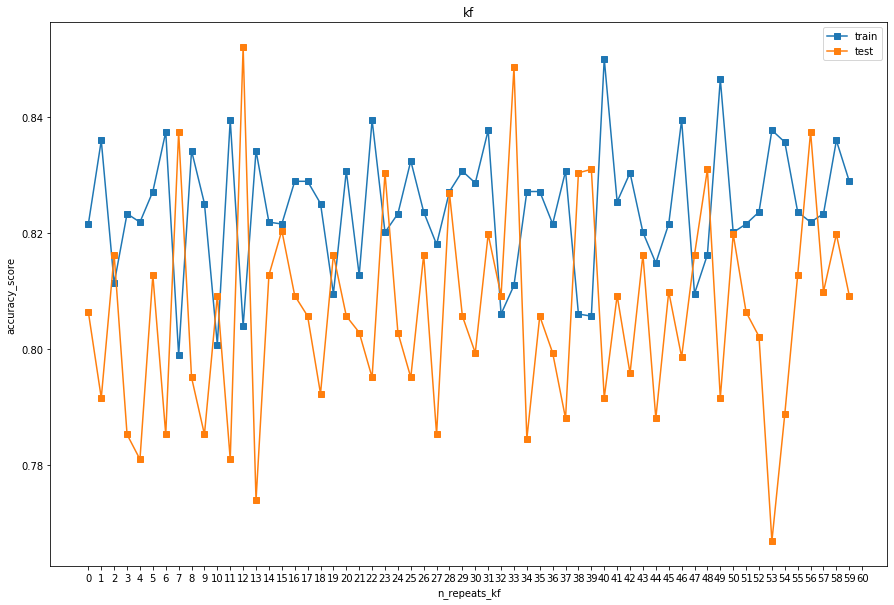

Значение среднего accuracy на подвыборке train -  0.82, на подвыборке test -  0.81, что на 2.1999999999999997% меньше.
Значение стандартного отклонения на подвыборке train -  0.0109, на подвыборке test -  0.0177, что на 61.45% больше.


In [ ]:
a,b = log_reg_analysis_KFold(X, y, viz=True)
print('Значение среднего accuracy на подвыборке train - ', str(round(a.mean(),2))+',', end=' ')
print('на подвыборке test - ', str(round(b.mean(),2))+',', end=' ')
print('что на', str(round(1 - b.mean()/a.mean(),4)*100)+'%', 'меньше.')
print('Значение стандартного отклонения на подвыборке train - ', str(round(a.std(),4))+',', end=' ')
print('на подвыборке test - ', str(round(b.std(),4))+',', end=' ')
print('что на', str(round(b.std()/a.std() - 1,4)*100)+'%', 'больше.')

---

Функция *log_reg_analysis_KFold()* дает более надежные оценки, чем *log_reg_analysis_random_state()*.

По результатам анализа мы видим, что модель переобучена.

---

Применим метод главных компонент к нашим данным:

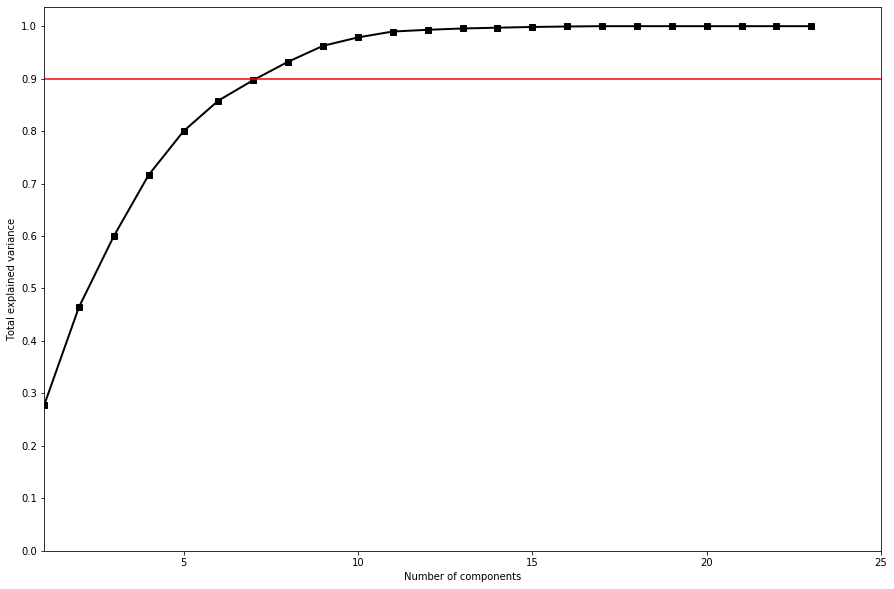

In [ ]:
pca = PCA(n_components=X.shape[1])
x_mean = X.mean(axis=0)
X_centered = X - x_mean
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
plt.plot(np.arange(1,X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), color='k', lw=2, marker='s')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(1, X.shape[1]+2)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')
plt.show()

X_Test_centered = X_Test - x_mean

---

График показывает, что нужно брать 7 или 8 главных компонент.

---

Проведем анализ главных компонент с помощью кросс-валидации. Для этого напишем функцию *log_reg_analysis_pca_with_KFold()* с пятью параметрами:
- X_centered = X - X.mean(axis=0) - матрица, полученная при обучении главных компонент;
- pca - модель главных компонент, обученная на соответствующей матрице X_centered;
- top - определение уровня для лучших, с точки зрения среднего, значений accuracy для обучающей и тестовой подвыборок (по умолчанию top=3);
- xy_leg - параметр месторасположения легенды на графике;
- yticks_add - параметр изменения оси у.

Каждый набор главных компонент будет передан функции *log_reg_analysis_KFold*, в результате чего будет собрана статистическая информация о средних значениях accuracy и стандартных отклонениях. Результат визуализируется.

***Внимание!*** На больших объемах данных данный метод приведет к длительным расчетам!

In [ ]:
def log_reg_analysis_pca_with_KFold(X_centered, pca, top=3, xy_leg='best', yticks_add=0.1):
    """Возможные значения для xy_leg: 'upper left', 'upper right', 'lower left', 'lower right';
       yticks_add - удлинение оси y, например, yticksup=0.25 удлиняет ось y на 25% вверх
       (для размещения легенды)"""

    stat = []
    for j in range(1,X_centered.shape[1]+1):
        a,b = log_reg_analysis_KFold(pca.transform(X_centered)[:,:j], y, viz=False)    
        stat.append([a.mean(), a.std(), b.mean(), b.std()])        
    stat = np.array(stat)
        
    # построение графика среднего accuracy на фоне области стандартного отклонения    
    ind = np.array([j for j in range(1,stat.shape[0]+1)])
    plt.fill_between(ind, stat[:,0] - stat[:,1], stat[:,0] + stat[:,1], facecolor='blue', alpha = 0.1, 
                     color = 'blue', linewidth = 1, linestyle = '-')
    plt.plot(ind, stat[:,0], 'blue', marker='s')
    toplvl_a = np.sort(np.unique(stat[:,0]))[-top]
    plt.axhline(toplvl_a, c='red', alpha = 0.3, linewidth = 1)
    
    plt.fill_between(ind, stat[:,2] - stat[:,3], stat[:,2] + stat[:,3], facecolor='orange', alpha = 0.1, 
                     color = 'orange', linewidth = 1, linestyle = '-')
    plt.plot(ind, stat[:,2], 'orange', marker='s')
    toplvl_b = np.sort(np.unique(stat[:,2]))[-top]
    plt.axhline(toplvl_b, c='green', alpha = 0.3, linewidth = 1)
    
    a_min = (stat[:,0] - stat[:,1]).min()
    a_max = (stat[:,0] + stat[:,1]).max()
    b_min = (stat[:,2] - stat[:,3]).min()
    b_max = (stat[:,2] + stat[:,3]).max()
    y_min = min(a_min, b_min)
    y_max = max(a_max, b_max)
    if yticks_add > 0:
        y_max += yticks_add*(y_max - y_min)
    else:
        y_min += yticks_add*(y_max - y_min)
        y_max += 0.1*(y_max - y_min)
    plt.xlabel('количество главных компонент')
    plt.ylabel('accuracy')
    plt.title("""Cреднее значение accuracy и соответствующее стандартное отклонение при использовании n главных 
                 компонент""")
    plt.xticks(ind)
    plt.yticks(np.arange(y_min, y_max, 0.1*(y_max-y_min)))
    plt.legend(['Средний accuracy train', 'Нижняя граница топовых значений accuracy train', 
                'Средний accuracy test', 'Нижняя граница топовых значений accuracy test',
                'Область стандартного отклонения train', 'Область стандартного отклонения test'],
                loc = xy_leg)
    plt.show()
    
    print('По критерию среднего accuracy train рекомендуется рассмотреть', 
          ', '.join(map(str, ind[stat[:,0]>=toplvl_a])), 'главных компонент')
    print()
    print('По критерию среднего accuracy test рекомендуется рассмотреть', 
          ', '.join(map(str, ind[stat[:,2]>=toplvl_b])), 'главных компонент')
    print()

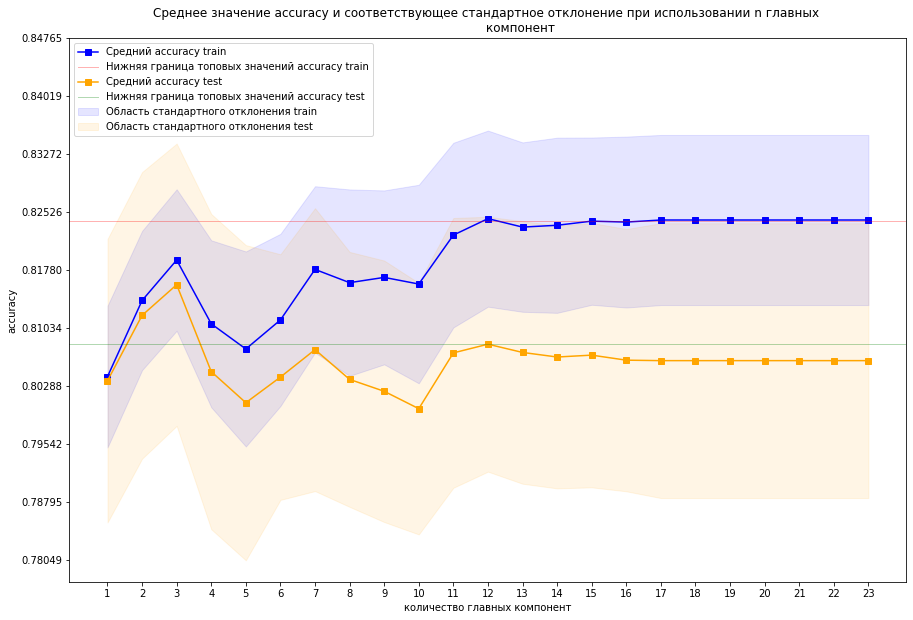

По критерию среднего accuracy train рекомендуется рассмотреть 12, 15, 17, 18, 19, 20, 21, 22, 23 главных компонент

По критерию среднего accuracy test рекомендуется рассмотреть 2, 3, 12 главных компонент



In [ ]:
log_reg_analysis_pca_with_KFold(X_centered, pca, xy_leg='upper left', yticks_add=0.35)

---

Для идеальной модели график будет выглядеть следующим образом:
- Точки среднего accuracy обучающей и тестовой подвыборок совпадают;
- Границы стандартного отклонения accuracy обучающей и тестовой подвыборок совпадают;
- Границы стандартного отклонения находятся в точке среднего accuracy;
- Средние accuracy принимают значение 1.

Выбор количества главных компонент должен руководствоваться принципами близости к идеальной модели. Если рассмотреть рекомендации по среднему accuracy train, то увидим, что модели переобучаются - accuracy test не попадают в область стандартного отклонения accuracy train. По критерию среднего accuracy test можно предположить, что модели с двумя и тремя главными компонентами являются недообученными, о чем свидетельствуют низкие значения средних метрик, а так же низкий уровень сохраненной дисперсии.

---

Для борьбы с переобучением удалим часть признаков из рассмотрения. Во-первых, удалим все признаки с большим количеством неинформативных значений - aristocrat, rev и cabin. Во-вторых удалим признаки обращения Miss, Mr, Mrs и Master, так как информация о половозрастной структуре у нас содержится в признаках f1, f2, m1, m2, m3. В третьих удалим признаки 1, 2 и 3, так как класс кают определяется принадлежностью к признакам price1, price2 и price3.

Для оставшихся признаков построим главные компоненты и проведем их анализ с помощью кросс-валидации:

In [ ]:
col2 = ['f1','f2','m1','m2','m3','price1','price2','price3','family1','family2','Q','S','C']
X2 = df[col2].values
y2 = df.survived.values
X2_Test = df_test[col2].values
y2_Test = dg.survived.values
x2_min = X2.min(axis=0)
x2_max = X2.max(axis=0)
X2 = (X2 - x2_min)/(x2_max - x2_min)
X2_Test = (X2_Test - x2_min)/(x2_max - x2_min)

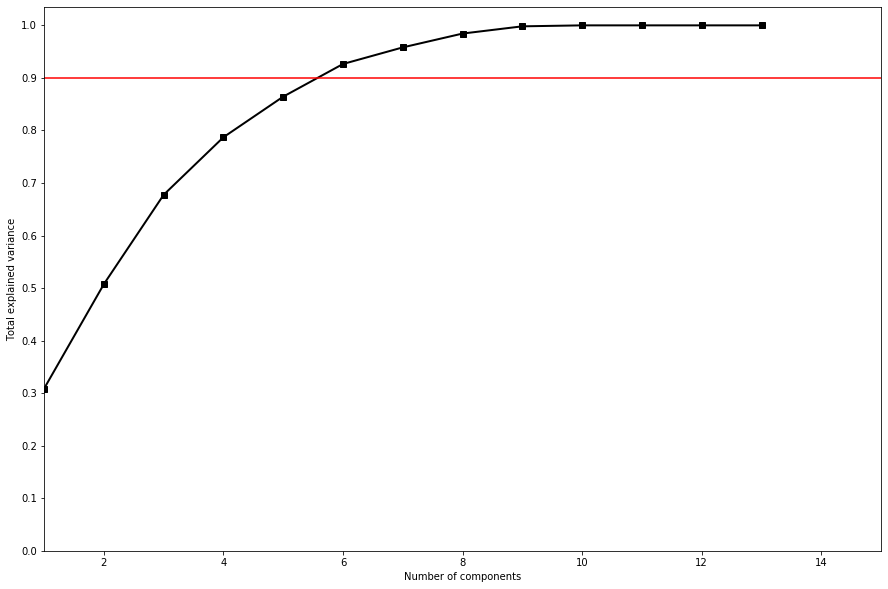

In [ ]:
pca2 = PCA(n_components=X2.shape[1])
x2_mean = X2.mean(axis=0)
X2_centered = X2 - x2_mean
pca2.fit(X2_centered)
X2_pca = pca2.transform(X2_centered)
plt.plot(np.arange(1,X2.shape[1]+1), np.cumsum(pca2.explained_variance_ratio_), color='k', lw=2, marker='s')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(1, X2.shape[1]+2)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')
plt.show()
X2_Test_centered = X2_Test - x2_mean

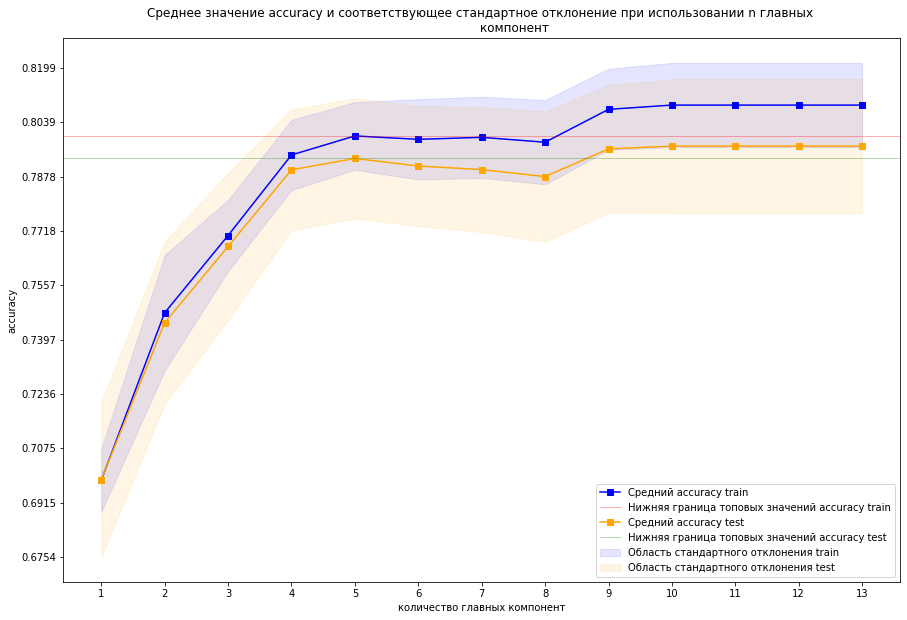

По критерию среднего accuracy train рекомендуется рассмотреть 5, 9, 10, 11, 12, 13 главных компонент

По критерию среднего accuracy test рекомендуется рассмотреть 5, 9, 10, 11, 12, 13 главных компонент



In [ ]:
log_reg_analysis_pca_with_KFold(X2_centered, pca2, top=3, xy_leg='lower right')

---

Обратим внимание на два "локтя" на графике:
- 4 главных компоненты - модель недообучена.
- 9 главных компонент - оба средних значения принадлежат обеим областям стандартного отклонения и входят в топ-3 лучших средних значений accuracy. Выбирать больше 9 нет смысла - незначительный прирост среднего accuracy может компенсироваться увеличением переобучения модели.

Построим модель на основе 9 главных компонент и оценим качество на обучающей и тестовой выборке:

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       369
           1       0.74      0.71      0.72       226

    accuracy                           0.79       595
   macro avg       0.78      0.78      0.78       595
weighted avg       0.79      0.79      0.79       595

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       168
           1       0.68      0.74      0.71        87

    accuracy                           0.79       255
   macro avg       0.77      0.78      0.77       255
weighted avg       0.80      0.79      0.79       255

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       292
           1       0.90      0.93      0.91       167

    accuracy                           0.93       459
   macro avg       0.93      0.93      0.93       459
weighted avg       0.94      0.93      0.93       459



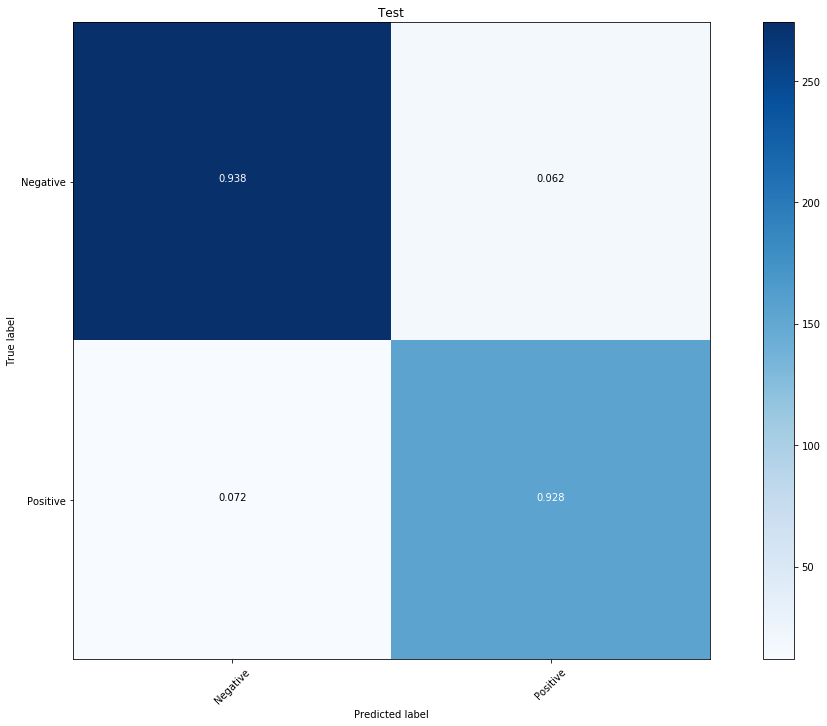

In [ ]:
n_pca = 9

X_train, X_test, y_train, y_test = train_test_split(pca2.transform(X2_centered)[:,:n_pca], y, test_size=0.3, 
                                                    random_state=21)
lr = LogisticRegression(random_state=21)
lr.fit(X_train, y_train)
print(classification_report(y_train, lr.predict(X_train)))
print(classification_report(y_test, lr.predict(X_test)))
X2_Test_pca = pca2.transform(X2_Test_centered)[:,:n_pca]
print(classification_report(y2_Test, lr.predict(X2_Test_pca)))
plot_confusion_matrix(confusion_matrix(y2_Test, lr.predict(X2_Test_pca)), classes=['Negative', 'Positive'], 
                      title='Test', normalize=True)
plt.show()

---

Получили:
1. Метрики показывают отсутствие переобучения модели.
2. На тестовых данных результат на 3% лучше, чем у переобученной модели, построенной ранее, не смотря на трехпроцентное ухудшение метрик на обучающей выборке.

---

# Задание

Данное задание рассчитано на 2 дня для группы из двух или трех человек. Основная цель задания - произвести очистку данных.

### 1. Загрузите данные о продаже квартир:
- train_sber.csv - данные для обучения

Например:

In [11]:
df_task = pd.read_csv('/Users/Int/DS/Python_DS_beginner._Team00-0/datasets/train_sber.csv')
df_task.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

Вам доступны еще два файла с информацией:
- data_dictionary.docx - описание всех признаков (в папке misc)
- macro.csv - макроэкономические показатели (в папке misc)

---

### 2. Проведите очистку данных

Во время очистки данных вам необходимо заполнить таблицу:

In [12]:
columns = ['Признак', 'Количество пропущенных значений', 'Количество ошибочных значений', 
           'Количество выбросов', 'Управление', 'Комментарий']
data_cleanup_table = pd.DataFrame(columns=columns)
data_cleanup_table.Признак = df_task.columns
data_cleanup_table.head()

,Признак,Количество пропущенных значений,Количество ошибочных значений,Количество выбросов,Управление,Комментарий
0,id,NaN,NaN,NaN,NaN,NaN
1,timestamp,NaN,NaN,NaN,NaN,NaN
2,full_sq,NaN,NaN,NaN,NaN,NaN
3,life_sq,NaN,NaN,NaN,NaN,NaN
4,floor,NaN,NaN,NaN,NaN,NaN


Допускается заполнение таблицы в Excel или любом ином табличном редакторе, с возможностью сохранения файла в формате xlsx или csv.

---

Особенности:
1. Количество пропущенных значений, Количество ошибочных значений и Количество выбросов следует определять до изменения датафрейма.
2. Под ошибкой понимается любое доказано неверное значение вне зависимости от природы его возникновения.
3. В колонку управление последовательно заносится информация об управлении пропущенными значениями, ошибками, выбросами и непосредственно самим признаком, как он трансформируется в данные для построения модели.
4. В комментарии заносится аргументация выбранного управления, а также любая информация, которая может быть интересна проверяющему.

***Внимание!*** Допускается единое управление признаком (удаление), если доказано, что он нерелевантен.

***Рекомендация!*** Если вы проводили какой-либо анализ или управление, но затем решили отказаться от него, закоментируйте это в файле решения и в таблице, возможно проверяющий это оценит.

---



---

### 3. Постройте регрессионную модель

Задание посвящено очистке данных, однако вам предлогается построить модель на основе линейной регрессии [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Это самая простая модель регрессии. Для демонстрации построим модель прогнозирования показателя *fare* в зависимости от показателей класса каюты, порта отправления и количества членов семьи:

0.44036971745376324 0.4233775095748944
37.80480781467841 [ 45.5451716  -17.4433172  -28.1018544   -3.65230607  -7.00935993
  10.661666     8.1436562 ]


[]

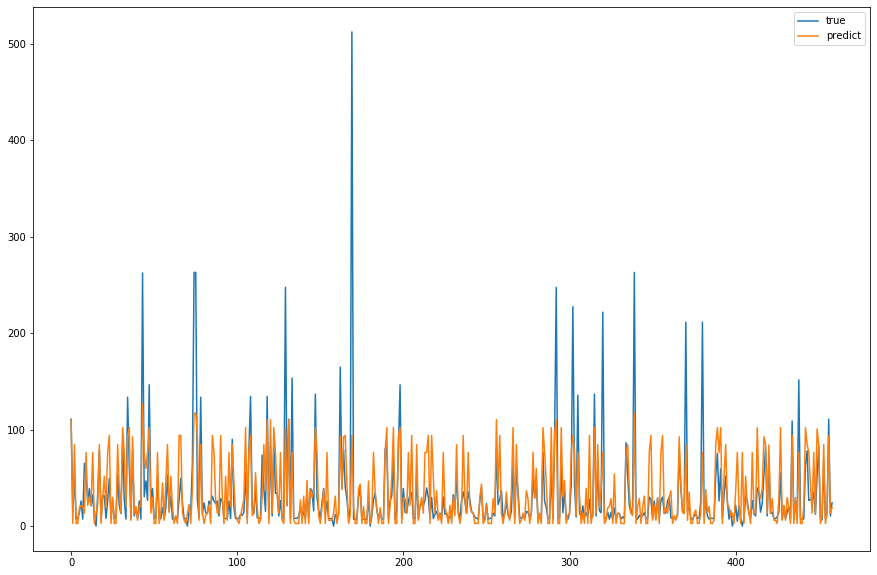

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['1', '2', '3', 'Q', 'S', 'C', 'family']].values
y = df.fare.values
X_test = df_test[['1', '2', '3', 'Q', 'S', 'C', 'family']].values
y_test = df_test.fare.values

model = LinearRegression().fit(X, y)

print(model.score(X, y),model.score(X_test, y_test))
print(model.intercept_, model.coef_)
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), model.predict(X_test))
plt.legend(['true', 'predict'])
plt.plot()

---

Получили, что модель объясняет 44% дисперсии на обучающей и 42% на тестовой выборке. Уберем выбросы, ограничив стоимость билета максимум 130 фунтами:

0.6419492858830913 0.6669137060166475
26.291673437526192 [ 25.63592727  -8.19054545 -17.44538182  -0.94749302  -1.79130812
   2.73880113   6.00137953]


[]

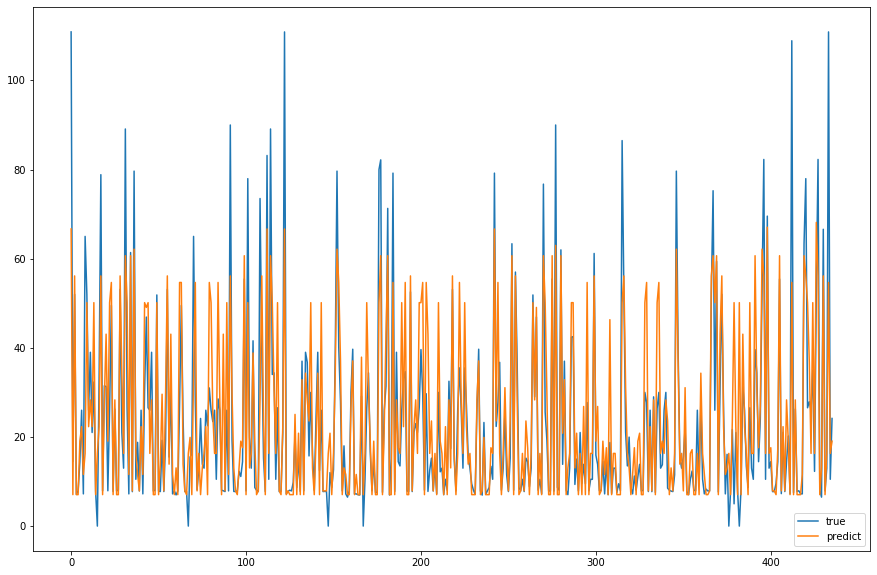

In [ ]:
X = df[['1', '2', '3', 'Q', 'S', 'C', 'family']][df.fare < 130].values
y = df.fare[df.fare < 130].values
X_test = df_test[['1', '2', '3', 'Q', 'S', 'C', 'family']][df_test.fare < 130].values
y_test = df_test.fare[df_test.fare < 130].values

model = LinearRegression().fit(X, y)

print(model.score(X, y),model.score(X_test, y_test))
print(model.intercept_, model.coef_)
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), model.predict(X_test))
plt.legend(['true', 'predict'])
plt.plot()

---

Модель объясняет 64% дисперсии показателя на обучающей и 67% на тестовой выборке, т.е. примерно 35% стоимости билета остаются не объясненными. Коэффициенты модели интерпретируются следующим образом: 
- Билет стоит 26.29 фунтов.
- За первый класс придется доплатить 25.64 фунта.
- За второй и третий класс будет предоставлена скидка 8.19 и 17.45 фунтов соответственно.
- При посадке в портах Q и S будет предоставлена скидка 0.95 и 1.79 фунта соответственно, при посадке в С придется доплатить 2.74 фунта.
- За каждого члена семьи дополнительная плата составляет 6 фунтов.

Следует отметить, что у разработанной модели не совсем верная логика. Дело в том, что все скидки и доплаты должны действовать на всех членов семьи, а в модели скидки и доплаты рассчитываются относительно билета, а за членов семьи берется дополнительная плата, в размере, близком к минимальной стоимости билета.

---

Кроме линейной регрессии вы можете попробовать построить модели на основе других методов - это позволит заработать дополнительные баллы.

---

Так как у вас имеется только выборка для обучения, то анализ качества модели необходимо проводить с помощью кросс-валидации. Используйте для этого метод [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

Например:

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
scores

array([0.63613558, 0.61827881, 0.51873255, 0.6618132 , 0.68195343])

---

Среднее качество:

In [ ]:
scores.mean()

0.6233827117975539

---

Удачи!